# Lab2 - Data Exploration and Preprocessing
## Abeer Ahmad (38) - Mohammed Deifallah (59)
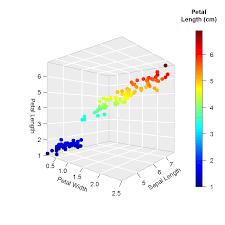


# Imports

In [3]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA # for feature projection
from sklearn.preprocessing import MinMaxScaler # for min-max scaling
from scipy import stats # for z-score normalization
from sklearn.feature_selection import SelectKBest # for feature selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# 1. Download and Read Data

Downloading the [image segmentation dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/image/)  
Add both files: segmentation.data and segmentation.test together to get a large training dataset.

## 1.1. Reading the dataset from CSV file

In [4]:
dataset = pd.read_csv("data.csv", sep=';')
dataset.sort_values(by='CLASS', inplace = True, axis=0)
X_df = dataset.drop(['CLASS'], axis = 1)
y_df = dataset['CLASS'];
X = np.array(X_df)
y = np.array(y_df)
classes = y_df.unique()
features = X_df.columns

## 1.2. Dataset Structure

In [5]:
print('Image segmentation dataset has ' + str(len(X)) + ' readings')
print('Image segmentation dataset has ' + str(X.shape[1]) + ' attributes')
print('Image segmentation dataset has ' + str(y_df.nunique()) + ' classes:')
for label in classes:
    print('\t-' + label + ': ' + str(len(dataset[y_df == label])) + ' samples')

Image segmentation dataset has 2310 readings
Image segmentation dataset has 19 attributes
Image segmentation dataset has 7 classes:
	-BRICKFACE: 330 samples
	-CEMENT: 330 samples
	-FOLIAGE: 330 samples
	-GRASS: 330 samples
	-PATH: 330 samples
	-SKY: 330 samples
	-WINDOW: 330 samples


## 1.3. Looking into the data

In [6]:
dataset.head(100)

CLASS  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0     BRICKFACE                  140                  125                   9   
1388  BRICKFACE                   27                   68                   9   
1389  BRICKFACE                   29                  100                   9   
1390  BRICKFACE                   23                  113                   9   
1391  BRICKFACE                   40                   85                   9   
1393  BRICKFACE                   77                   78                   9   
1394  BRICKFACE                   96                   92                   9   
1395  BRICKFACE                  147                   92                   9   
1396  BRICKFACE                   42                   59                   9   
1397  BRICKFACE                    2                   63                   9   
1398  BRICKFACE                   31                  106                   9   
1399  BRICKFACE                   33                  104                   9   
1400  BRICKFACE                   81                   98                   9   
1401  BRICKFACE                    6                   90                   9   
1402  BRICKFACE                   76                   81                   9   
1403  BRICKFACE                  145                   90                   9   
1404  BRICKFACE                  133                   67                   9   
1405  BRICKFACE                   80                   95                   9   
1387  BRICKFACE                   91                  115                   9   
1406  BRICKFACE                   75                  107                   9   
1386  BRICKFACE                  121                   60                   9   
1384  BRICKFACE                   73                  103                   9   
1367  BRICKFACE                   67                   64                   9   
1368  BRICKFACE                   90                  101                   9   
1369  BRICKFACE                  125                   56                   9   
1370  BRICKFACE                   42                   56                   9   
1371  BRICKFACE                   11                  108                   9   
1372  BRICKFACE                   69                   75                   9   
1373  BRICKFACE                    2                   44                   9   
1374  BRICKFACE                  139                   86                   9   
...         ...                  ...                  ...                 ...   
1416  BRICKFACE                   23                   55                   9   
1417  BRICKFACE                   75                   75                   9   
1366  BRICKFACE                   69                   81                   9   
1418  BRICKFACE                   89                   68                   9   
1420  BRICKFACE                   76                   64                   9   
1421  BRICKFACE                   25                  116                   9   
1422  BRICKFACE                    6                   51                   9   
1423  BRICKFACE                   32                   45                   9   
1424  BRICKFACE                  149                   64                   9   
1425  BRICKFACE                   29                   81                   9   
1426  BRICKFACE                    2                   98                   9   
1427  BRICKFACE                    2                   89                   9   
1419  BRICKFACE                   38                   41                   9   
1365  BRICKFACE                    8                  102                   9   
1364  BRICKFACE                  145                  101                   9   
1363  BRICKFACE                  136                   77                   9   
1303  BRICKFACE                   75                   67                   9   
1304  BRICKFACE                   14     

---
**Comments:**
*  **Data examples are grouped by class labels.**
*  **'REGION-PIXEL-COUNT' (3rd attribute) is constant over all data samples, and will cause mathematical exceptions during later calculations. It would be more convenient if we ignored that feature.**



In [7]:
X_df = dataset.drop(['CLASS', 'REGION-PIXEL-COUNT'], axis = 1)
X = np.array(X_df)
features = X_df.columns

## 1.4. Visualization
Plot the data using plt.plot() to be able visualize it.

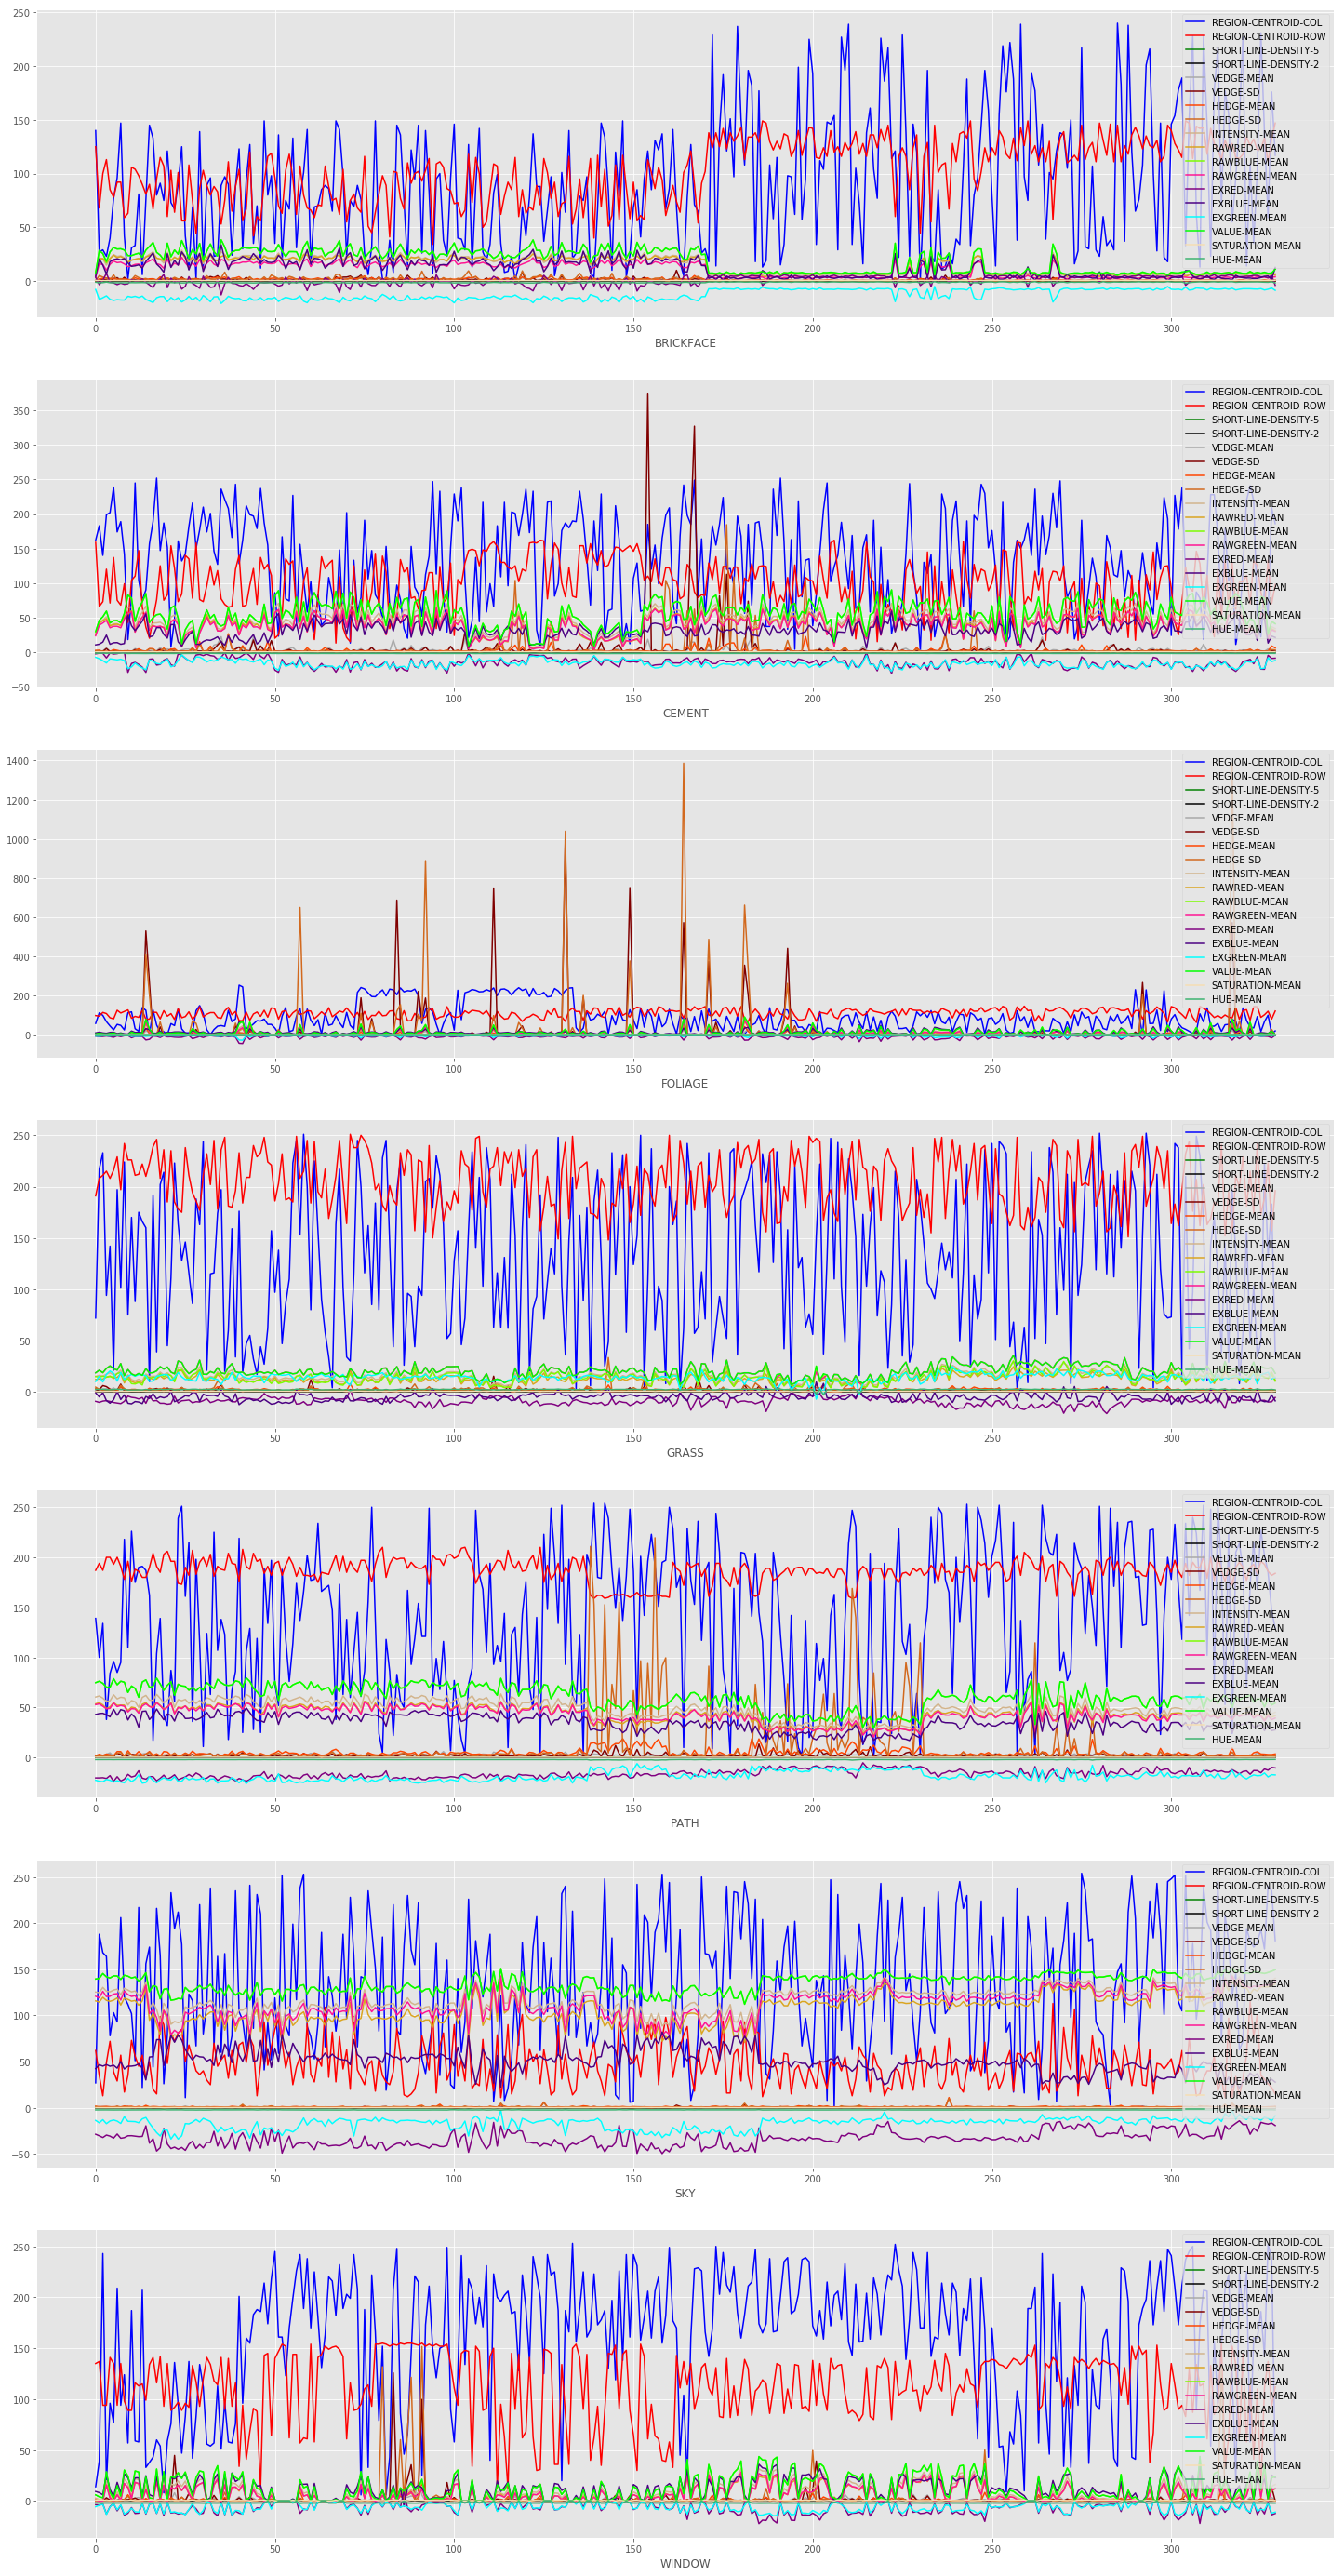

In [8]:
fig, axes = plt.subplots(nrows= 7, ncols=1, figsize=(25,50))
colors = ['blue', 'red', 'green', 'black', 'darkgrey', 'maroon', 'orangered', 'chocolate', 'tan',
         'goldenrod', 'lawngreen', 'deeppink', 'purple', 'indigo', 'cyan', 'lime', 'wheat', 'mediumseagreen']

for i, ax in enumerate(axes.flat):
    for feature in range(len(features)):
        ax.plot(X[y_df == classes[i], feature], label=features[feature], color=colors[feature])
        ax.set_xlabel(classes[i])  
        ax.legend(loc='upper right')
        
plt.show()

---
**Comments:**
*  **Some features always have near values. As a matter of fact, 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN' and 'VALUE-MEAN' are found to be often lying in the same range, indicating high correlation that needs to be considered in later feature reduction.**



# 2. Data Exploration

## 2.1. Pearson's Correlation
Computing the `Pearson’s correlation coefficient` between each 2 features.

In [9]:
correlation_matrix = X_df.corr(method='pearson')

In [10]:
display(correlation_matrix)

REGION-CENTROID-COL  REGION-CENTROID-ROW  \
REGION-CENTROID-COL              1.000000             0.026768   
REGION-CENTROID-ROW              0.026768             1.000000   
SHORT-LINE-DENSITY-5            -0.051962             0.064891   
SHORT-LINE-DENSITY-2            -0.015964             0.041869   
VEDGE-MEAN                      -0.011304             0.026146   
VEDGE-SD                         0.021960            -0.053578   
HEDGE-MEAN                      -0.018914             0.105223   
HEDGE-SD                        -0.001939            -0.021077   
INTENSITY-MEAN                   0.058957            -0.465240   
RAWRED-MEAN                      0.054673            -0.468009   
RAWBLUE-MEAN                     0.058169            -0.481521   
RAWGREEN-MEAN                    0.063381            -0.437971   
EXRED-MEAN                      -0.086816             0.353175   
EXBLUE-MEAN                      0.043098            -0.490219   
EXGREEN-MEAN                     0.014035             0.476421   
VALUE-MEAN                       0.060189            -0.458388   
SATURATION-MEAN                 -0.108214             0.081556   
HUE-MEAN                         0.039299             0.592930   

                      SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  \
REGION-CENTROID-COL              -0.051962             -0.015964   -0.011304   
REGION-CENTROID-ROW               0.064891              0.041869    0.026146   
SHORT-LINE-DENSITY-5              1.000000             -0.009024   -0.020206   
SHORT-LINE-DENSITY-2             -0.009024              1.000000    0.262575   
VEDGE-MEAN                       -0.020206              0.262575    1.000000   
VEDGE-SD                         -0.032781              0.193728    0.637452   
HEDGE-MEAN                       -0.021286              0.303182    0.559491   
HEDGE-SD                         -0.037996              0.243155    0.488347   
INTENSITY-MEAN                   -0.018211             -0.006911    0.005129   
RAWRED-MEAN                      -0.016755             -0.012471   -0.005482   
RAWBLUE-MEAN                     -0.021392              0.003078    0.020498   
RAWGREEN-MEAN                    -0.015604             -0.013435   -0.003099   
EXRED-MEAN                        0.028013             -0.044829   -0.100457   
EXBLUE-MEAN                      -0.036164              0.060979    0.106744   
EXGREEN-MEAN                      0.033182             -0.058362   -0.080120   
VALUE-MEAN                       -0.015886             -0.000145    0.018148   
SATURATION-MEAN                  -0.043221              0.016208   -0.064827   
HUE-MEAN                          0.112989             -0.082939   -0.097959   

                      VEDGE-SD  HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  \
REGION-CENTROID-COL   0.021960   -0.018914 -0.001939        0.058957   
REGION-CENTROID-ROW  -0.053578    0.105223 -0.021077       -0.465240   
SHORT-LINE-DENSITY-5 -0.032781   -0.021286 -0.037996       -0.018211   
SHORT-LINE-DENSITY-2  0.193728    0.303182  0.243155       -0.006911   
VEDGE-MEAN            0.637452    0.559491  0.488347        0.005129   
VEDGE-SD              1.000000    0.471016  0.703049        0.003006   
HEDGE-MEAN            0.471016    1.000000  0.668179        0.033973   
HEDGE-SD              0.703049    0.668179  1.000000        0.013518   
INTENSITY-MEAN        0.003006    0.033973  0.013518        1.000000   
RAWRED-MEAN          -0.002138    0.026059  0.008538        0.998112   
RAWBLUE-MEAN          0.006782    0.043846  0.016899        0.995809   
RAWGREEN-MEAN         0.003410    0.029406  0.014121        0.995842   
EXRED-MEAN           -0.049123   -0.099434 -0.056186       -0.830261   
EXBLUE-MEAN           0.027659    0.093738  0.033647        0.792257   
EXGREEN-MEAN          0.002396   -0.059111 -0.000666       -0.509756   
VALUE-MEAN            0.004804    0.042232  0.014858        0.997385   
SATURATION-MEAN       

In [11]:
def heatmap(data, row_labels, row_intervals, col_labels, col_intervals,
            yticklabel_size=10, xticklabel_size=10, rotate=False, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    # If 'ax' in not passed, get the current Axes instance on the current
    # figure matching the given keyword args, or create one.
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, aspect="equal", **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04, **cbar_kw) # 'fraction' and 'pad' properties are for the colorbar alignment
    cbar.ax.set_ylabel(cbarlabel, size=18, rotation=-90, va="bottom") # 'weight' property can be used for bold text (weight='bold')
    
    # We want to show ticks at the middle of each class...
    ax.set_xticks(col_intervals) # np.arange: returns evenly spaced values within a given interval
    ax.set_yticks(row_intervals)
    # ... and label them with the respective classes.
    ax.set_xticklabels(col_labels, size=xticklabel_size)
    ax.set_yticklabels(row_labels, size=yticklabel_size)
        
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    
    # If rotate is true, rotate the xtick labels and set their alignment.
    if rotate:
        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")
    
    ax.grid('off')
    
    return im, cbar

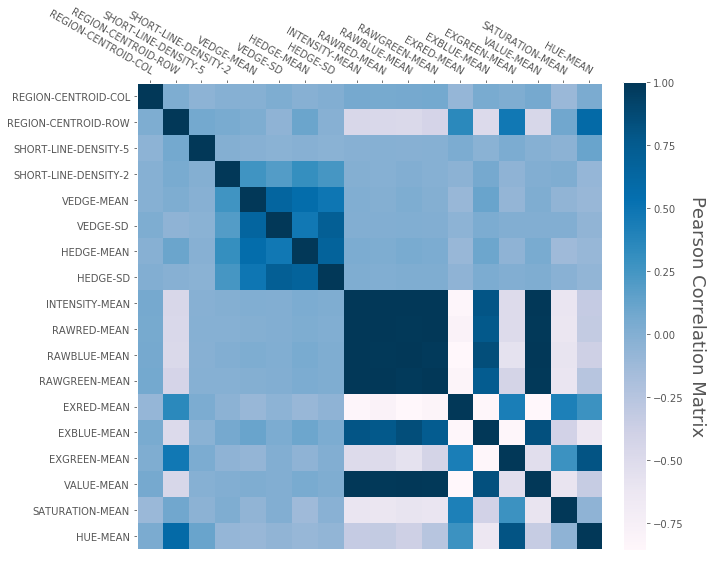

In [12]:
intervals = np.arange(len(features));
fig, ax = plt.subplots(figsize=(10, 10))
im, cbar = heatmap(correlation_matrix,features, intervals, features, intervals, rotate=True,
                   ax=ax, cmap="PuBu", cbarlabel="Pearson Correlation Matrix")

fig.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

## 2.2. Covariance Matrix
Compute the Covariance matrix of the dataset.

In [13]:
covariance_matrix = X_df.cov()

In [14]:
display(covariance_matrix)

REGION-CENTROID-COL  REGION-CENTROID-ROW  \
REGION-CENTROID-COL           5322.655633           112.261605   
REGION-CENTROID-ROW            112.261605          3304.393117   
SHORT-LINE-DENSITY-5            -0.152222             0.149783   
SHORT-LINE-DENSITY-2            -0.028226             0.058327   
VEDGE-MEAN                      -2.225830             4.056431   
VEDGE-SD                        71.850789          -138.121244   
HEDGE-MEAN                      -4.981611            21.835935   
HEDGE-SD                        -8.318737           -71.256512   
INTENSITY-MEAN                 164.209187         -1020.982645   
RAWRED-MEAN                    139.753091          -942.593272   
RAWBLUE-MEAN                   184.722513         -1204.825006   
RAWGREEN-MEAN                  168.151958          -915.529680   
EXRED-MEAN                     -73.368285           235.168129   
EXBLUE-MEAN                     61.539978          -551.527028   
EXGREEN-MEAN                    11.828309           316.358899   
VALUE-MEAN                     188.478189         -1130.983933   
SATURATION-MEAN                 -1.802488             1.070354   
HUE-MEAN                         4.430609            52.671047   

                      SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  \
REGION-CENTROID-COL              -0.152222             -0.028226   -2.225830   
REGION-CENTROID-ROW               0.149783              0.058327    4.056431   
SHORT-LINE-DENSITY-5              0.001612             -0.000009   -0.002190   
SHORT-LINE-DENSITY-2             -0.000009              0.000587    0.017174   
VEDGE-MEAN                       -0.002190              0.017174    7.284104   
VEDGE-SD                         -0.059032              0.210548   77.154914   
HEDGE-MEAN                       -0.003086              0.026525    5.451284   
HEDGE-SD                         -0.089729              0.346558   77.513850   
INTENSITY-MEAN                   -0.027916             -0.006394    0.528485   
RAWRED-MEAN                      -0.023573             -0.010589   -0.518380   
RAWBLUE-MEAN                     -0.037389              0.003247    2.407979   
RAWGREEN-MEAN                    -0.022785             -0.011840   -0.304143   
EXRED-MEAN                        0.013029             -0.012584   -3.140597   
EXBLUE-MEAN                      -0.028421              0.028923    5.638482   
EXGREEN-MEAN                      0.015391             -0.016338   -2.497886   
VALUE-MEAN                       -0.027379             -0.000151    2.102268   
SATURATION-MEAN                  -0.000396              0.000090   -0.039945   
HUE-MEAN                          0.007011             -0.003106   -0.408560   

                         VEDGE-SD  HEDGE-MEAN     HEDGE-SD  INTENSITY-MEAN  \
REGION-CENTROID-COL     71.850789   -4.981611    -8.318737      164.209187   
REGION-CENTROID-ROW   -138.121244   21.835935   -71.256512    -1020.982645   
SHORT-LINE-DENSITY-5    -0.059032   -0.003086    -0.089729       -0.027916   
SHORT-LINE-DENSITY-2     0.210548    0.026525     0.346558       -0.006394   
VEDGE-MEAN              77.154914    5.451284    77.513850        0.528485   
VEDGE-SD              2011.204665   76.257247  1854.284580        5.147211   
HEDGE-MEAN              76.257247   13.032705   141.864126        4.682097   
HEDGE-SD              1854.284580  141.864126  3458.794558       30.350893   
INTENSITY-MEAN           5.147211    4.682097    30.350893     1457.438265   
RAWRED-MEAN             -3.359009    3.296073    17.592150     1335.052524   
RAWBLUE-MEAN            13.239618    6.889813    43.260490     1654.758170   
RAWGREEN-MEAN            5.561028    3.860406    30.200059     1382.504132   
EXRED-MEAN             -25.518664   -4.158073   -38.276254     -367.157227   
EXBLUE-MEAN             24.277221    6.623148    38.728788      591.959640   
EXGREEN-MEAN             1.241442   -2.465074    -0.452533     -224.802412  

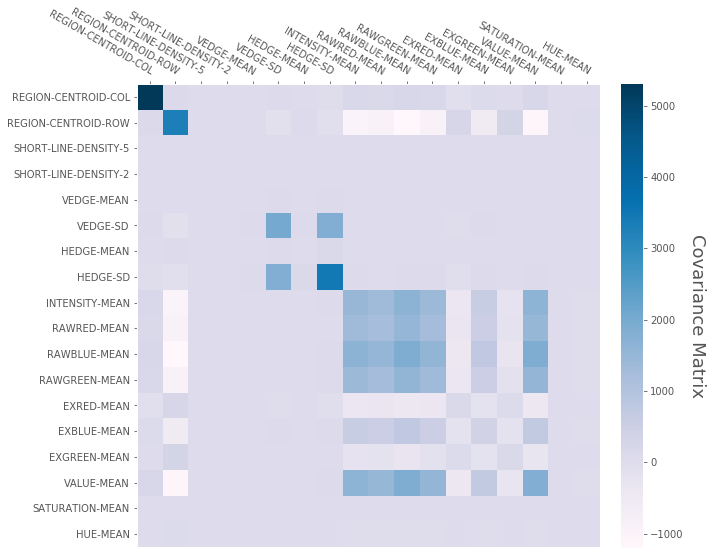

In [15]:
intervals = np.arange(len(features));
fig, ax = plt.subplots(figsize=(10, 10))
im, cbar = heatmap(covariance_matrix,features, intervals, features, intervals, rotate=True,
                   ax=ax, cmap="PuBu", cbarlabel="Covariance Matrix")

fig.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

---
**Comments:**
*  **As studied in the lecture, `Covariance Matrix` is somehow related to `Correlation Matrix`. Refering to [this](http://faculty.missouri.edu/huangf/data/mvnotes/Documents/variance_covariance%202017.pdf) besides the class lectures, it is observed that the diagonal of the `Covariance Matrix` is the squared standard deviation (`Variance`) of each corresponding variable. Thus, each element in the `Correlation Matrix` is the corresponding value in the `Covariance Matrix` divided by the multiplication of the standard deviations of both variables. In other words, let's write it in a mathematical equation: $$Cor(x, y) = \frac{Cov(x, y)}{\sigma_x \sigma_x}$$**

## 2.3. Histograms

In [16]:
def histogram(X, bins=None):
    plt.rcParams["figure.figsize"] = [15, 49] # adjusting figure size [width, height]

    fig, ax = plt.subplots(nrows=len(classes), ncols=1)
    colors = ['blue', 'red', 'green', 'black', 'darkgrey', 'maroon', 'orangered', 'chocolate', 'tan',
             'goldenrod', 'lawngreen', 'deeppink', 'purple', 'indigo', 'cyan', 'lime', 'wheat', 'mediumseagreen']

    for i, axes in enumerate(ax.flat): # for each class (subplot)
        for feature, color in zip(range(len(features)), colors): # for each feature
            axes.hist(X[y==classes[i], feature], bins, label=features[feature], # plot only examples belonging to that class
                    alpha=1, stacked=True, color=color) # 'alpha' determines the transparency
        axes.set_xlabel(classes[i])  
        axes.legend(loc='upper right')
    
    plt.show()
    return

### 5 bins

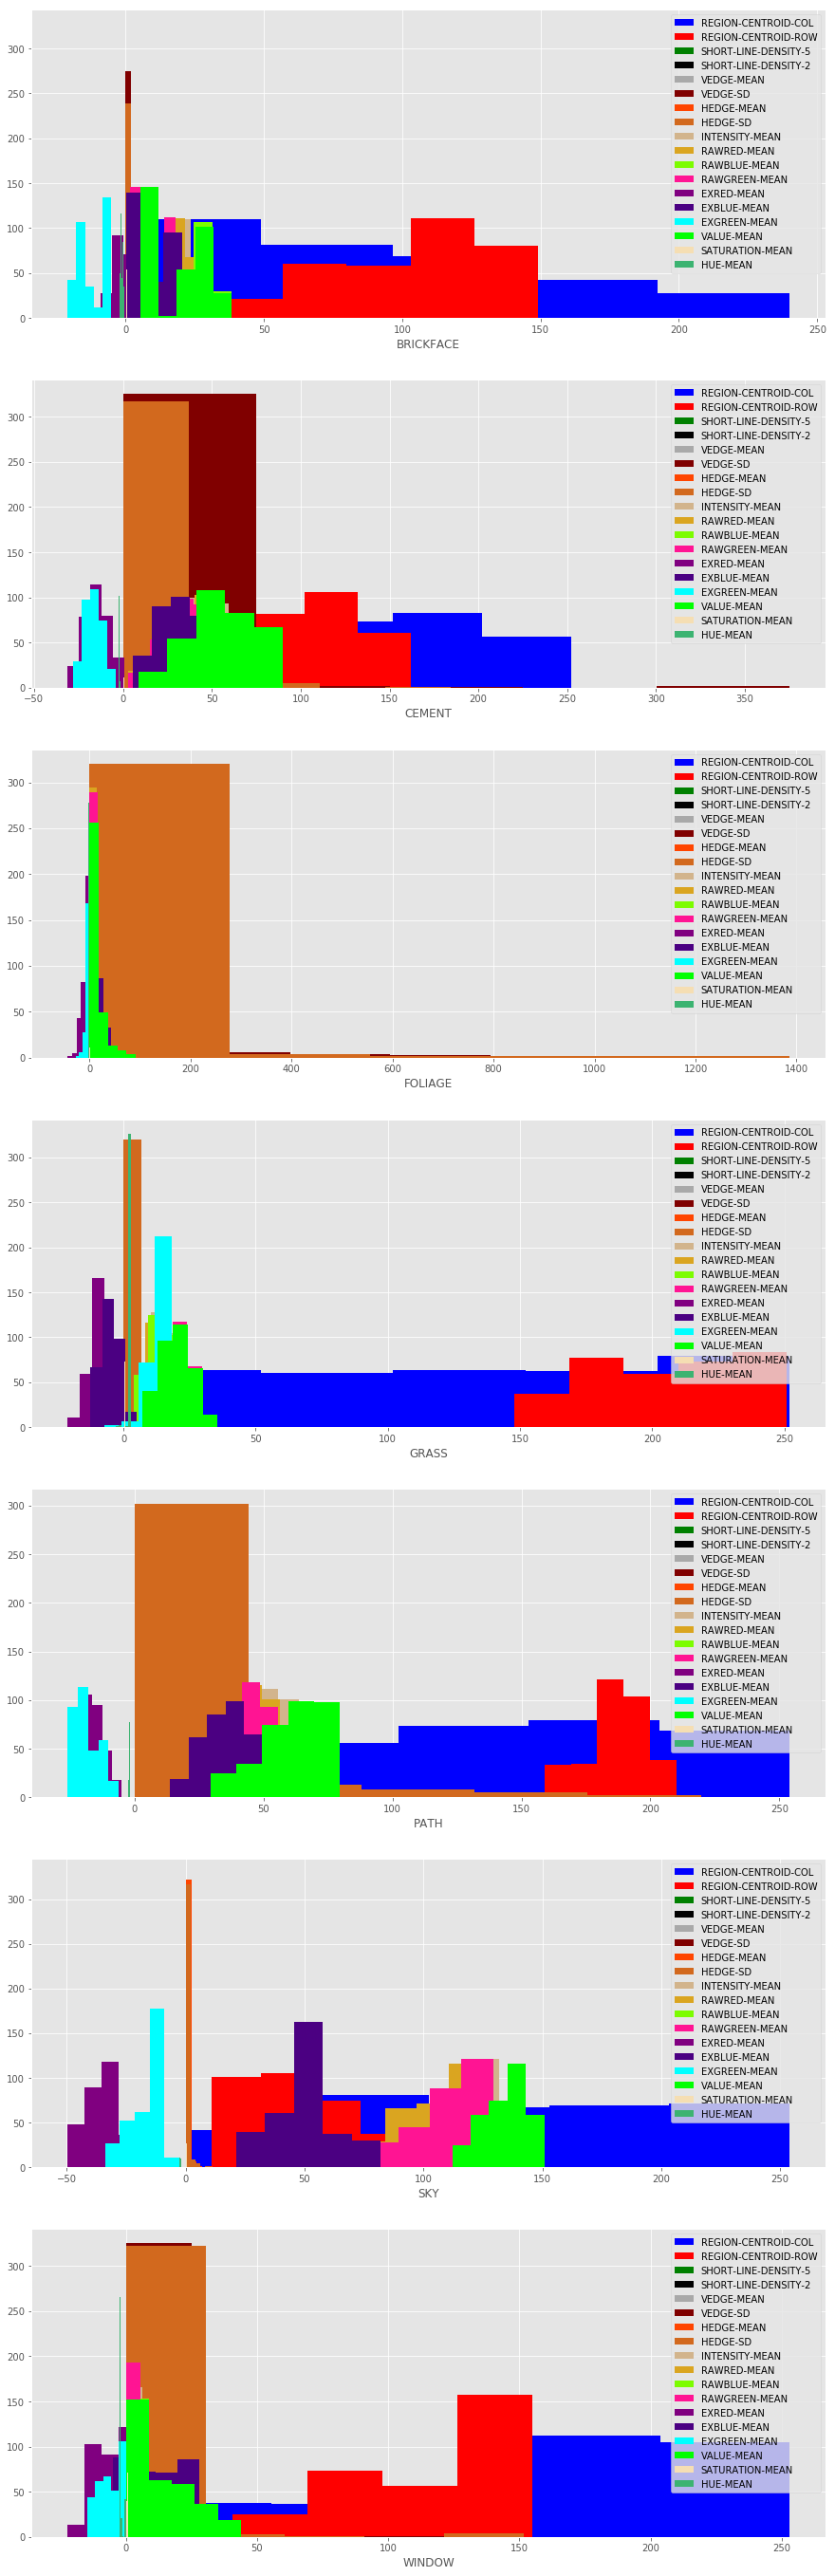

In [17]:
histogram(X, bins=5)

### 10 bins

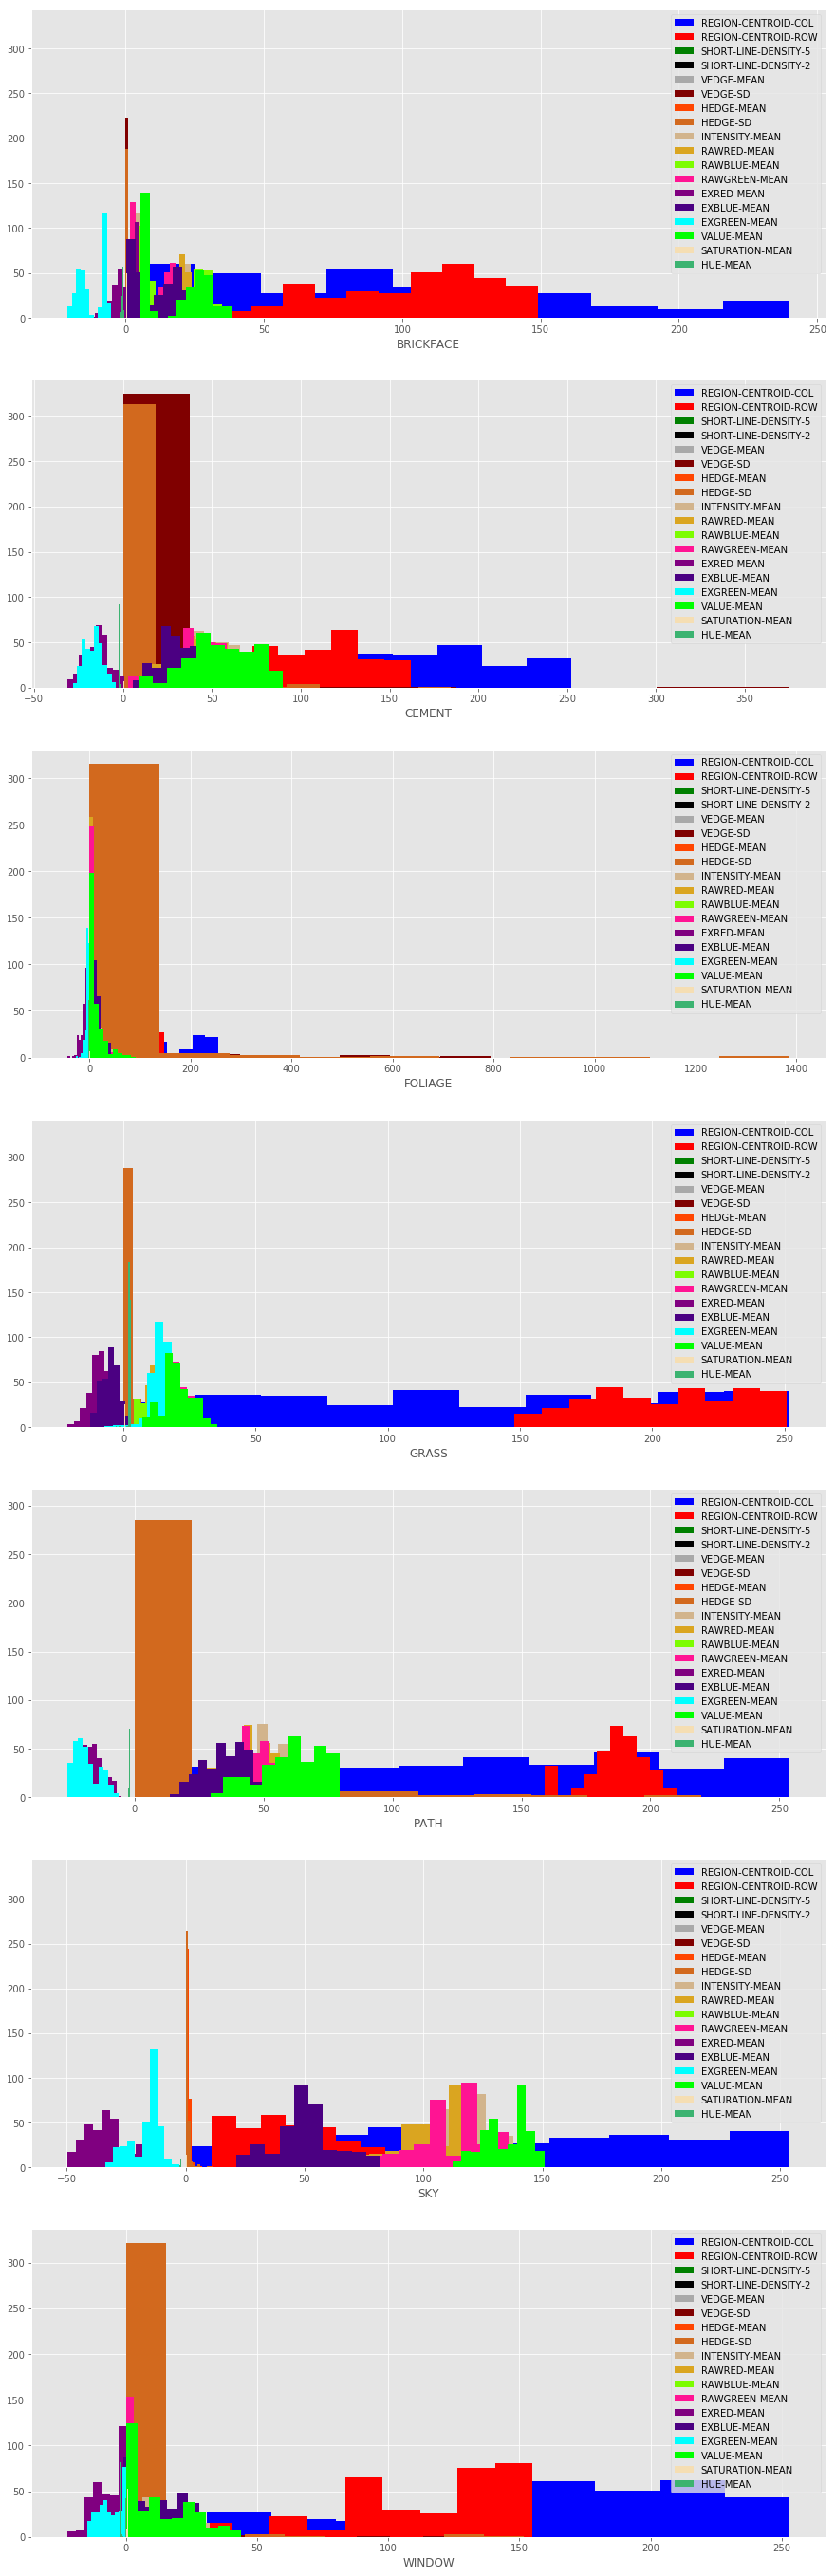

In [18]:
histogram(X, bins=10)

### 12 bins

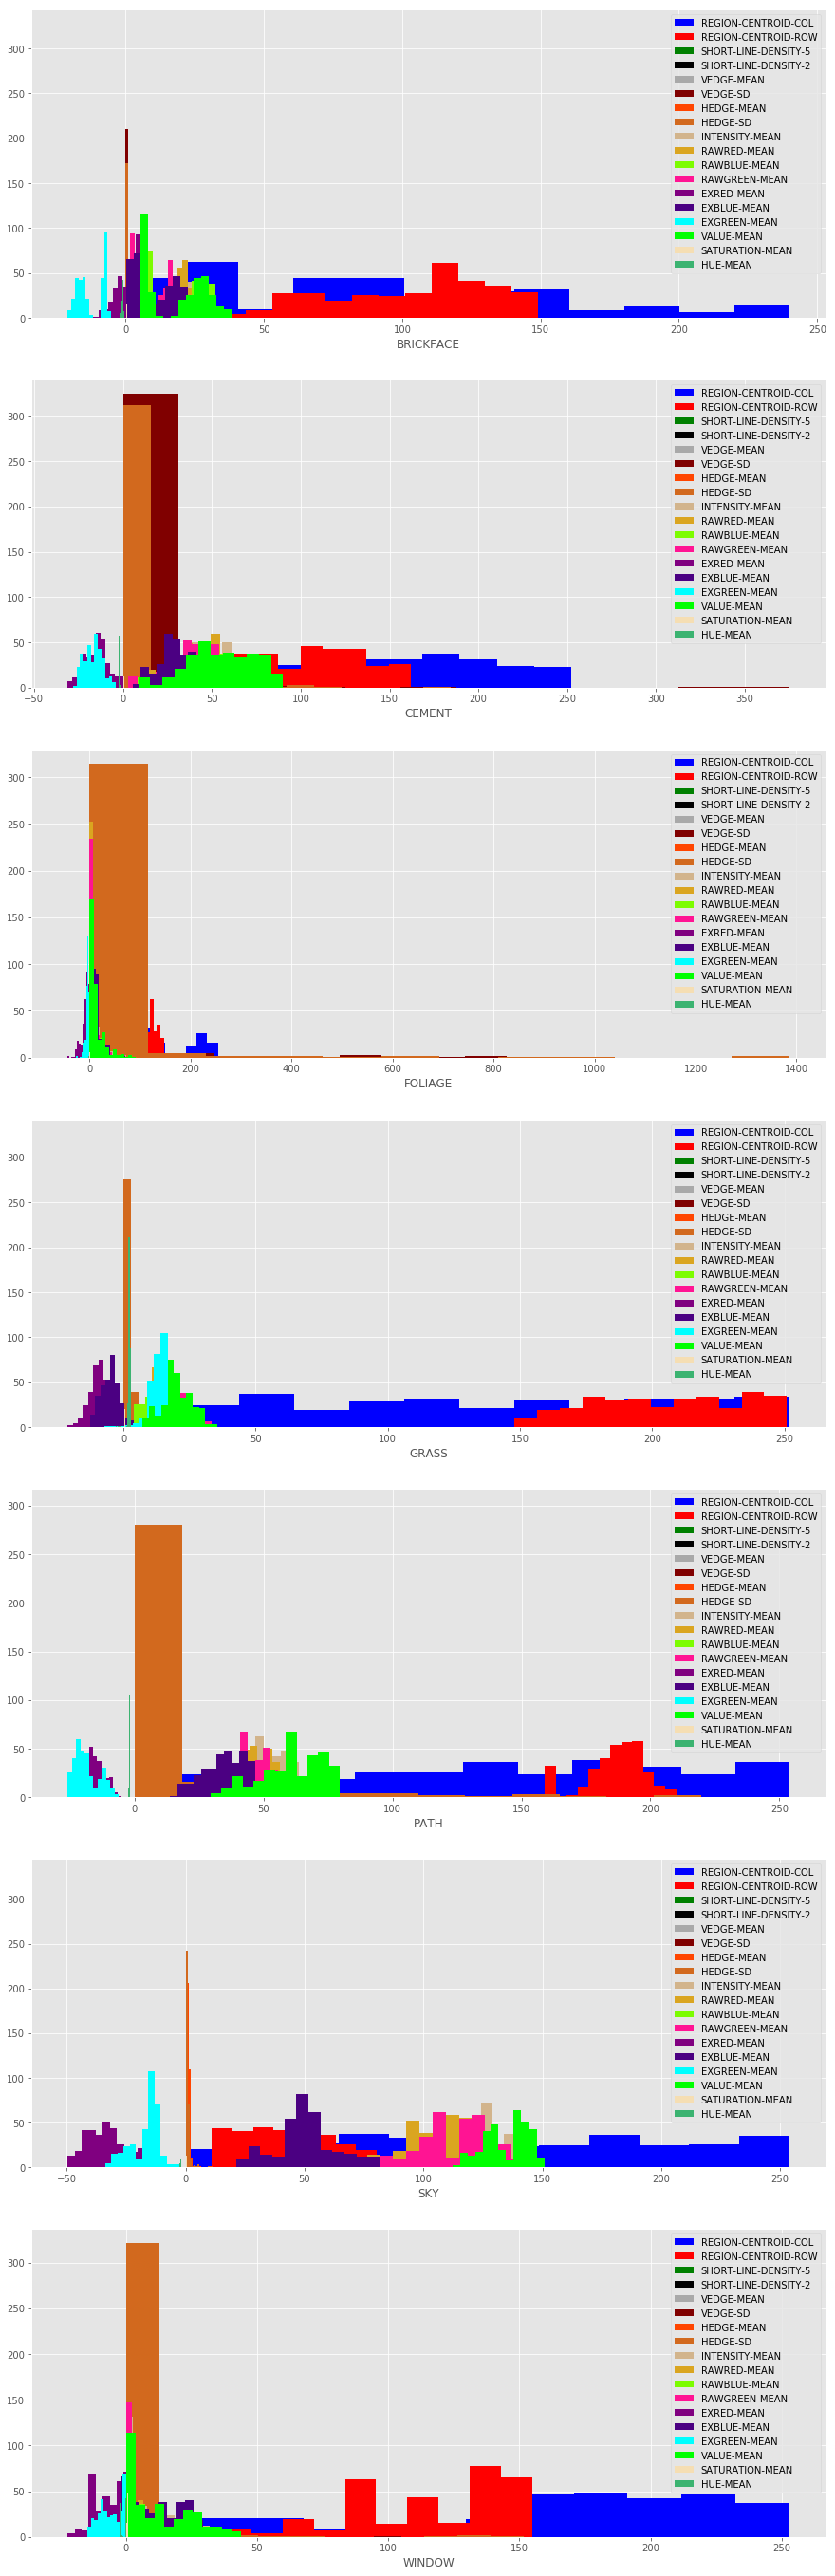

In [19]:
histogram(X, bins=12)

---
**Comments:**
*  **This type of histogram does not give much insight about the data samples.**
*  **Using more bins gives a more detailed visualization, and a better interpretation for the distribution.**

# 3. Data Preprocessing

## 3.1. Normalization

### 3.1.1. Min-Max Scaler

In [20]:
scaler = MinMaxScaler() # MinMaxScaler(feature_range=(0, 1), copy=True)
X_scaled_min_max = scaler.fit_transform(X)

In [21]:
display(pd.DataFrame(X_scaled_min_max, columns=features))

REGION-CENTROID-COL  REGION-CENTROID-ROW  SHORT-LINE-DENSITY-5  \
0                0.549407             0.475000              0.000000   
1                0.102767             0.237500              0.000000   
2                0.110672             0.370833              0.000000   
3                0.086957             0.425000              0.000000   
4                0.154150             0.308333              0.333333   
5                0.300395             0.279167              0.000000   
6                0.375494             0.337500              0.333333   
7                0.577075             0.337500              0.000000   
8                0.162055             0.200000              0.000000   
9                0.003953             0.216667              0.000000   
10               0.118577             0.395833              0.000000   
11               0.126482             0.387500              0.333333   
12               0.316206             0.362500              0.333333   
13               0.019763             0.329167              0.000000   
14               0.296443             0.291667              0.333333   
15               0.569170             0.329167              0.000000   
16               0.521739             0.233333              0.000000   
17               0.312253             0.350000              0.000000   
18               0.355731             0.433333              0.333333   
19               0.292490             0.400000              0.333333   
20               0.474308             0.204167              0.000000   
21               0.284585             0.383333              0.000000   
22               0.260870             0.220833              0.000000   
23               0.351779             0.375000              0.333333   
24               0.490119             0.187500              0.000000   
25               0.162055             0.187500              0.000000   
26               0.039526             0.404167              0.000000   
27               0.268775             0.266667              0.333333   
28               0.003953             0.137500              0.000000   
29               0.545455             0.312500              0.333333   
...                   ...                  ...                   ...   
2280             0.948617             0.516667              0.000000   
2281             0.826087             0.429167              0.000000   
2282             0.679842             0.329167              0.000000   
2283             0.833992             0.345833              0.000000   
2284             0.932806             0.300000              0.000000   
2285             0.964427             0.491667              0.000000   
2286             0.984190             0.316667              0.000000   
2287             0.351779             0.512500              0.000000   
2288             0.683794             0.425000              0.000000   
2289             0.814229             0.433333              0.000000   
2290             0.810277             0.208333              0.000000   
2291             0.209486             0.508333              0.000000   
2292             0.616601             0.308333              0.000000   
2293             0.375494             0.345833              0.000000   
2294             0.596838             0.600000              0.000000   
2295             0.818182             0.095833              0.000000   
2296             0.873518             0.212500              0.000000   
2297             0.482213             0.587500              0.000000   
2298             0.075099             0.512500              0.000000   
2299             0.877470             0.212500              0.000000   
2300             0.723320             0.558333              0.000000   
2301             0.885375             0.195833              0.000000   
2302             0.225296             0.425000              0.000000   
2303             0.628458             0.125000

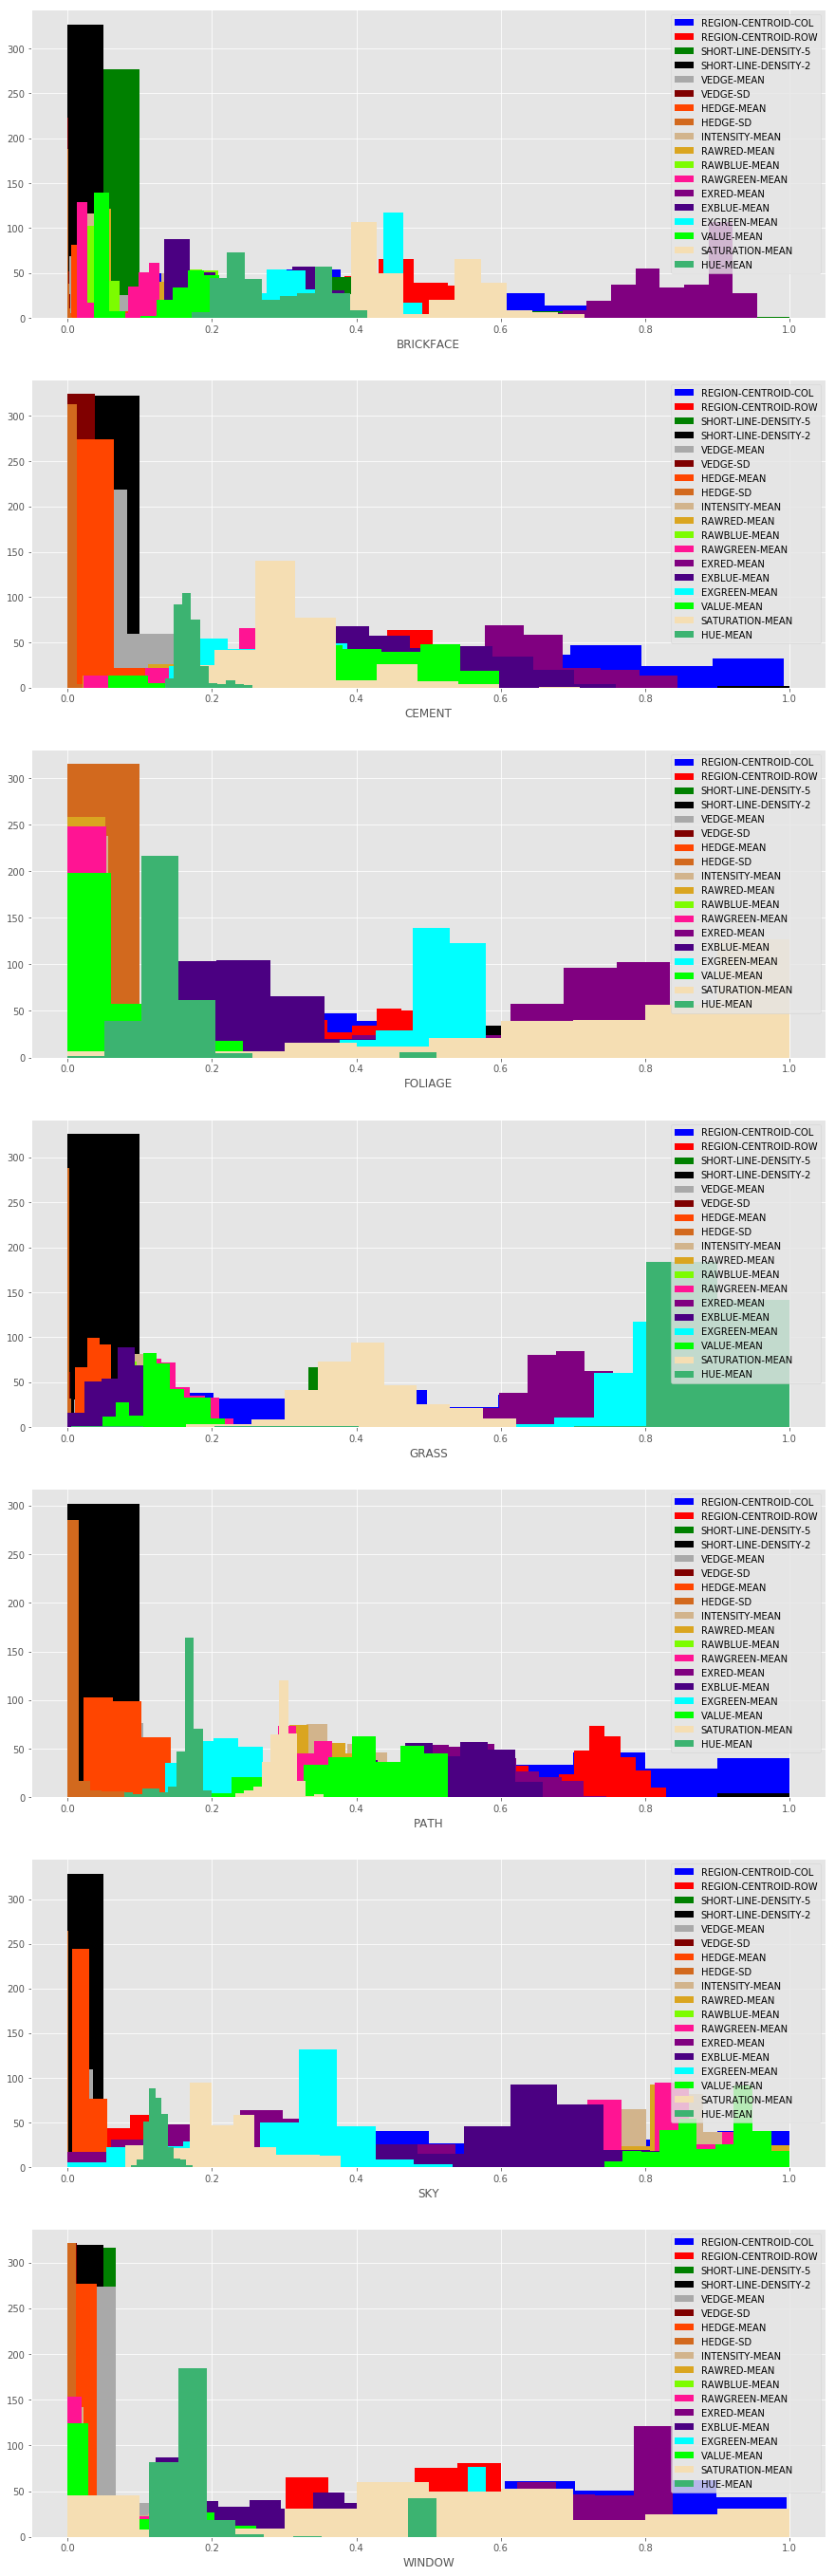

In [22]:
histogram(X_scaled_min_max)

---
**Comments:**
*  **The new range of the continuous data values becomes $[0, 1]$**
*  **As discussed in the class, this approach has some advantages. Of them, is that this approach is very sensitive to outliers. In details, in case the $min$ is so small or the $max$ is so large, then all the new values will be very close to each other, which is not good for $\textbf{Data Exploration}$ and $\textbf{Data Preprocessing}$**

### 3.1.2. Z-Score Normalization

check [this](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/) and [that](https://www.quora.com/While-calculating-a-z-score-what-do-you-do-when-standard-deviation-is-zero)

In [23]:
X_normalized_zscore = stats.zscore(X)
#np.nan_to_num(X_normalized_zscore, copy=False) # convert nan values to 0

In [24]:
display(pd.DataFrame(X_normalized_zscore, columns=features))

REGION-CENTROID-COL  REGION-CENTROID-ROW  SHORT-LINE-DENSITY-5  \
0                0.206827             0.027539             -0.357047   
1               -1.342375            -0.964259             -0.357047   
2               -1.314956            -0.407460             -0.357047   
3               -1.397214            -0.181261             -0.357047   
4               -1.164149            -0.668460              2.410668   
5               -0.656887            -0.790259             -0.357047   
6               -0.396402            -0.546660              2.410668   
7                0.302796            -0.546660             -0.357047   
8               -1.136729            -1.120859             -0.357047   
9               -1.685119            -1.051259             -0.357047   
10              -1.287536            -0.303061             -0.357047   
11              -1.260117            -0.337860              2.410668   
12              -0.602048            -0.442260              2.410668   
13              -1.630280            -0.581460             -0.357047   
14              -0.670597            -0.738059              2.410668   
15               0.275376            -0.581460             -0.357047   
16               0.110859            -0.981659             -0.357047   
17              -0.615758            -0.494460             -0.357047   
18              -0.464951            -0.146461              2.410668   
19              -0.684307            -0.285661              2.410668   
20              -0.053658            -1.103459             -0.357047   
21              -0.711726            -0.355260             -0.357047   
22              -0.793985            -1.033859             -0.357047   
23              -0.478661            -0.390060              2.410668   
24               0.001181            -1.173058             -0.357047   
25              -1.136729            -1.173058             -0.357047   
26              -1.561732            -0.268261             -0.357047   
27              -0.766565            -0.842459              2.410668   
28              -1.685119            -1.381858             -0.357047   
29               0.193118            -0.651060              2.410668   
...                   ...                  ...                   ...   
2280             1.591513             0.201538             -0.357047   
2281             1.166511            -0.163861             -0.357047   
2282             0.659250            -0.581460             -0.357047   
2283             1.193930            -0.511860             -0.357047   
2284             1.536674            -0.703260             -0.357047   
2285             1.646352             0.097138             -0.357047   
2286             1.714901            -0.633660             -0.357047   
2287            -0.478661             0.184138             -0.357047   
2288             0.672959            -0.181261             -0.357047   
2289             1.125381            -0.146461             -0.357047   
2290             1.111672            -1.086059             -0.357047   
2291            -0.972212             0.166738             -0.357047   
2292             0.439893            -0.668460             -0.357047   
2293            -0.396402            -0.511860             -0.357047   
2294             0.371345             0.549537             -0.357047   
2295             1.139091            -1.555857             -0.357047   
2296             1.331028            -1.068659             -0.357047   
2297            -0.026238             0.497337             -0.357047   
2298            -1.438344             0.184138             -0.357047   
2299             1.344737            -1.068659             -0.357047   
2300             0.810057             0.375538             -0.357047   
2301             1.372157            -1.138258             -0.357047   
2302            -0.917373            -0.181261             -0.357047   
2303             0.481023            -1.434058

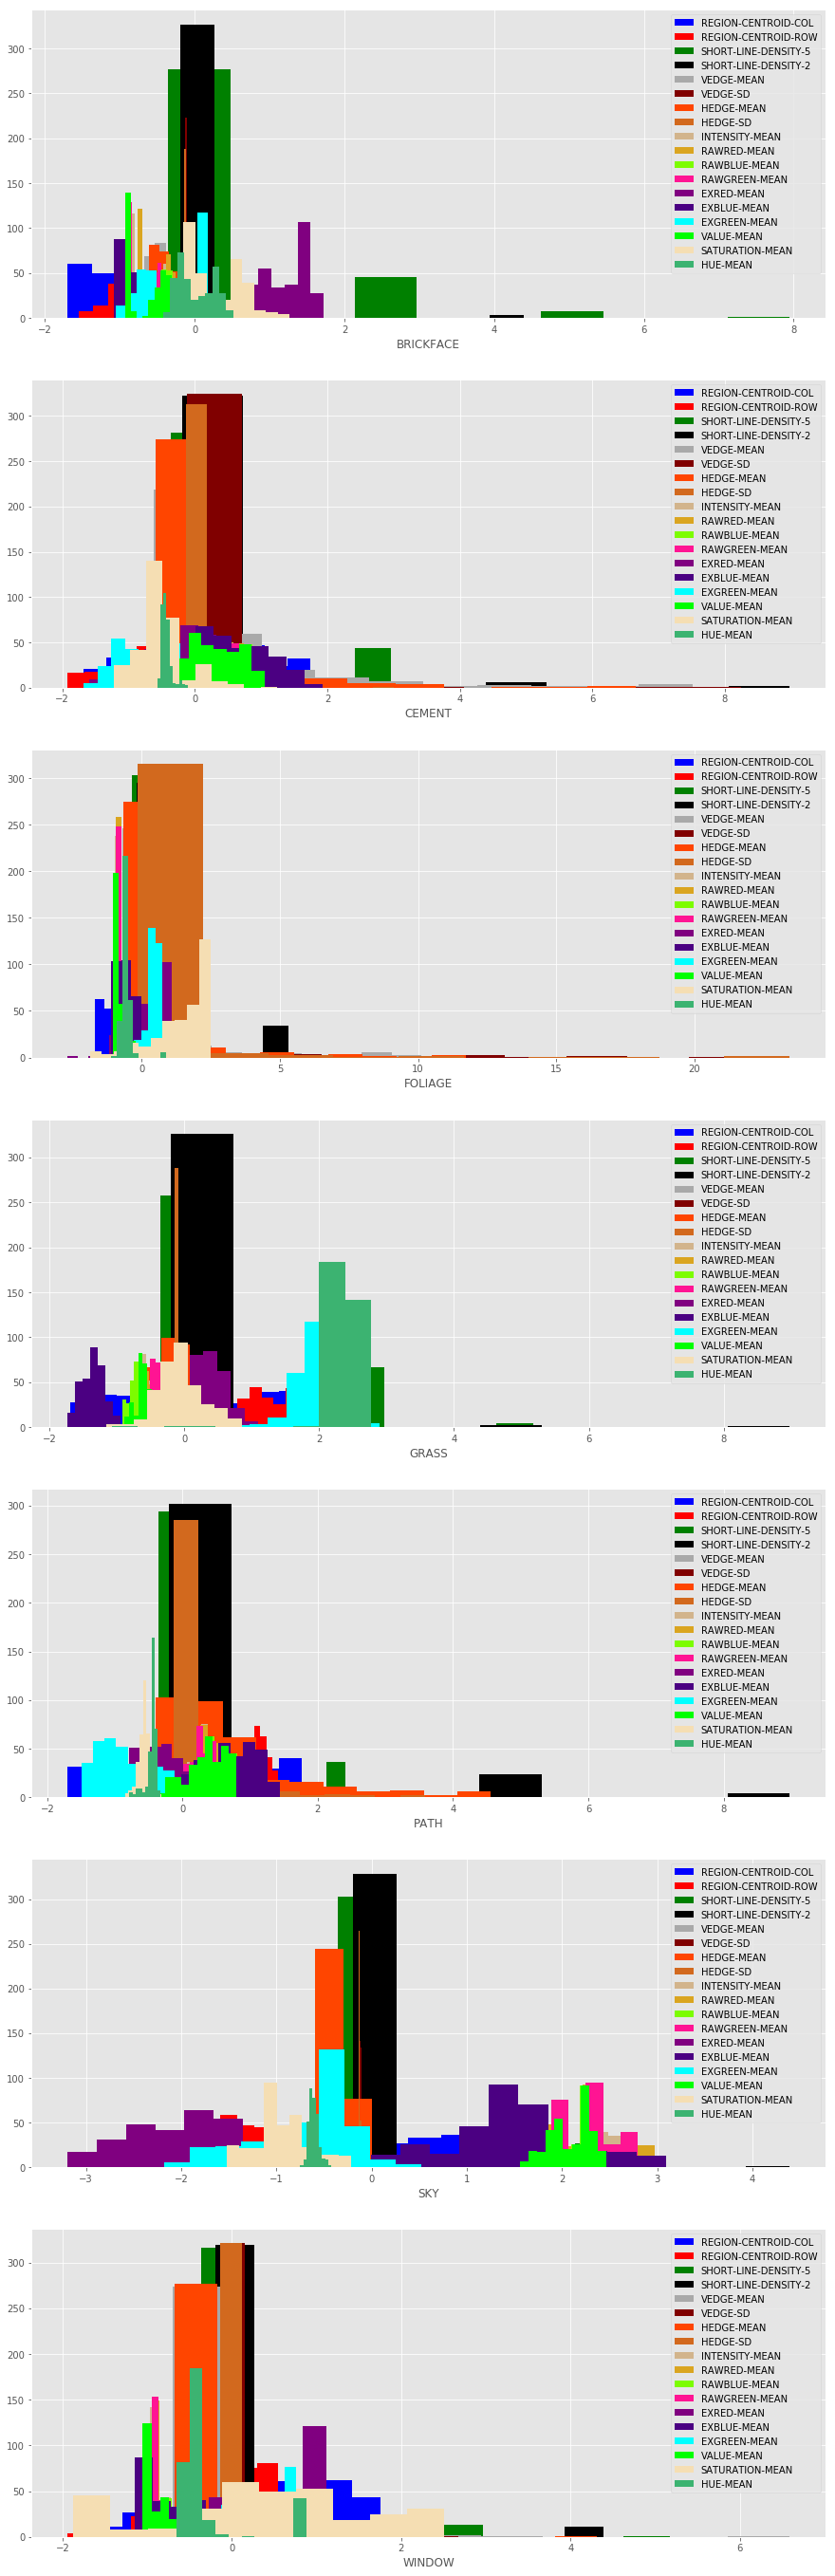

In [25]:
histogram(X_normalized_zscore)

---
**Comments:**
*  **It's obvious that `Z-score Normalization` results in a distribution with a `mean` of $0$ and a `standard deviation` of $1$.**
*  **This approach is very useful as it results into a known distribution, whose characterestics can be concluded and observed easily. In addition, it's more robust that the previous approach for two reasons:**
    * **It doesn't need to specify the minimum and maximum of the attribute, which is better for cases where those values are unknows.**
    * **When there're outliers that dominate `Min-Max Normalization`, this approach won't face that problem, but it could help detect them.**

## 3.2. Dimensionality Reduction

### 3.2.1. PCA

In [26]:
def plot_pca(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = features)
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (20,20))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar', figsize=(20,20));
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)


#### 3.2.1.1. Different Number of Components

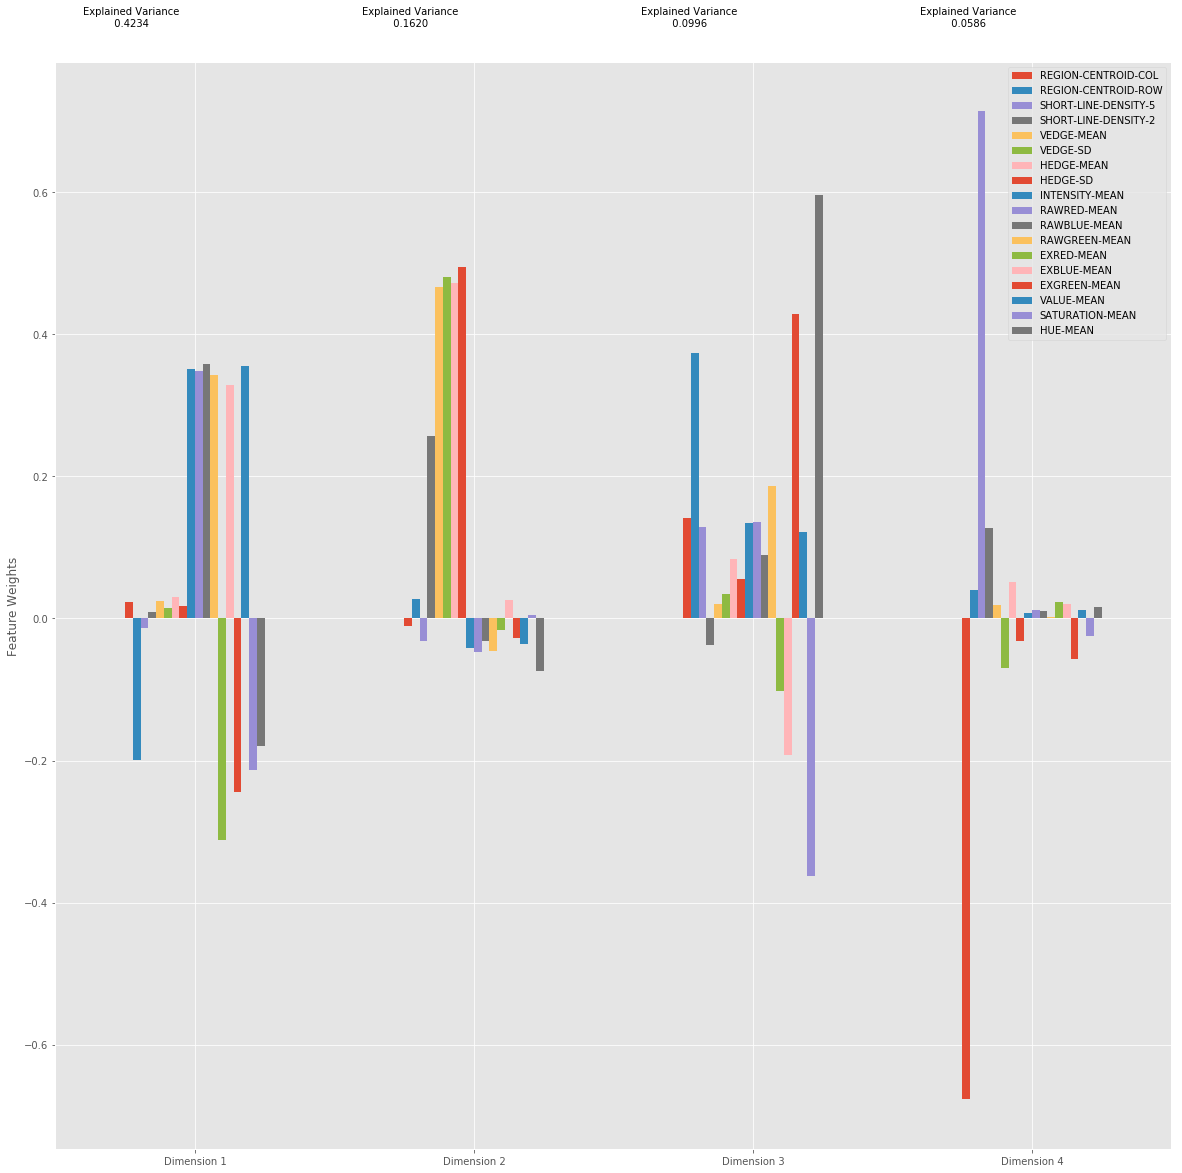

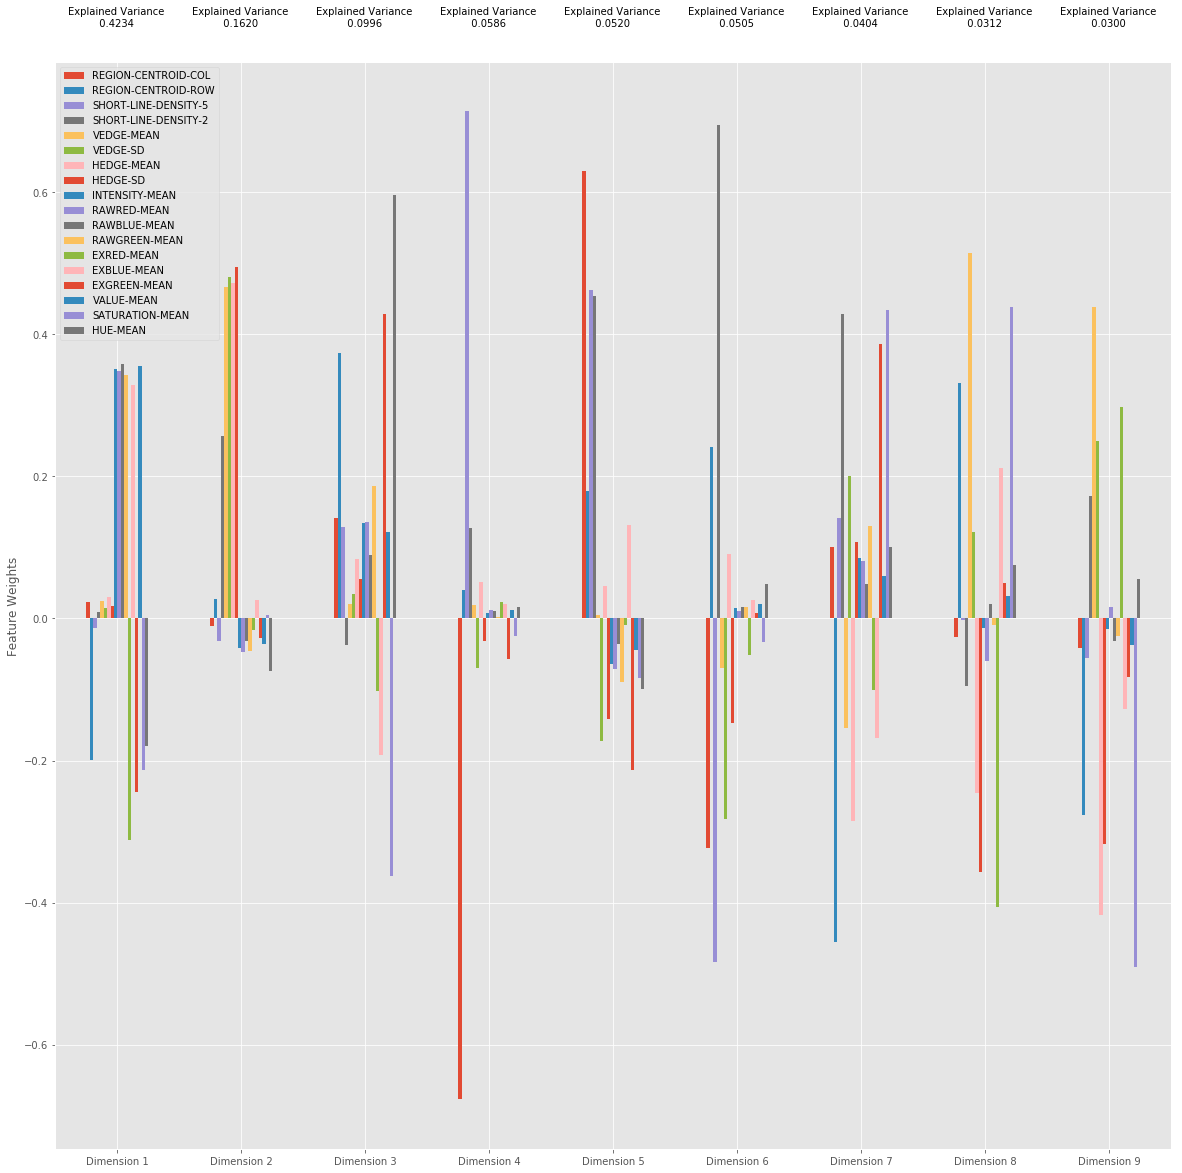

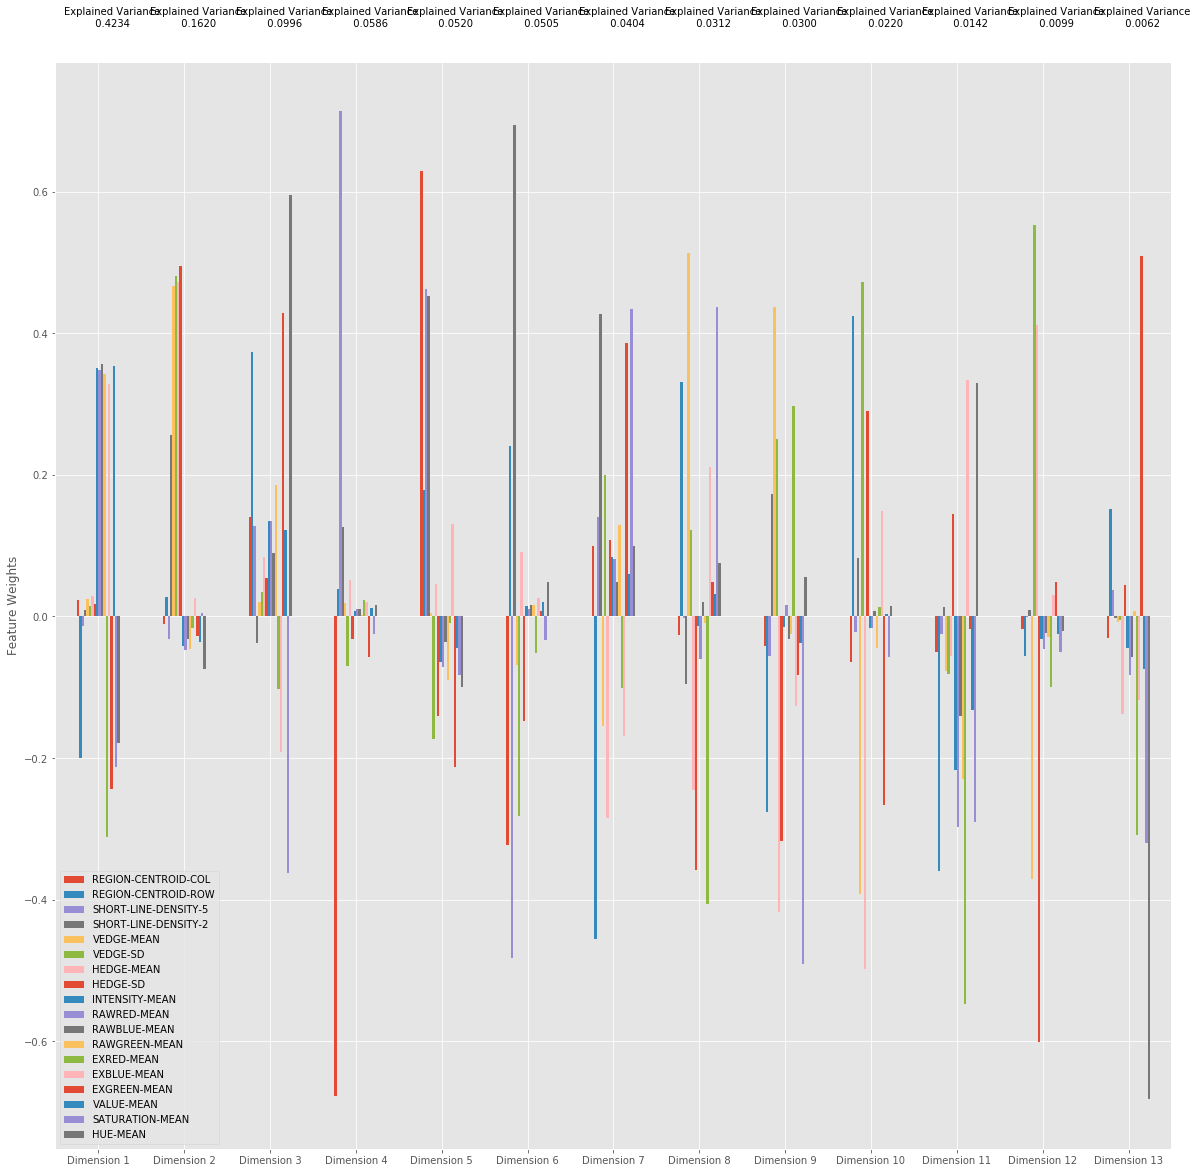

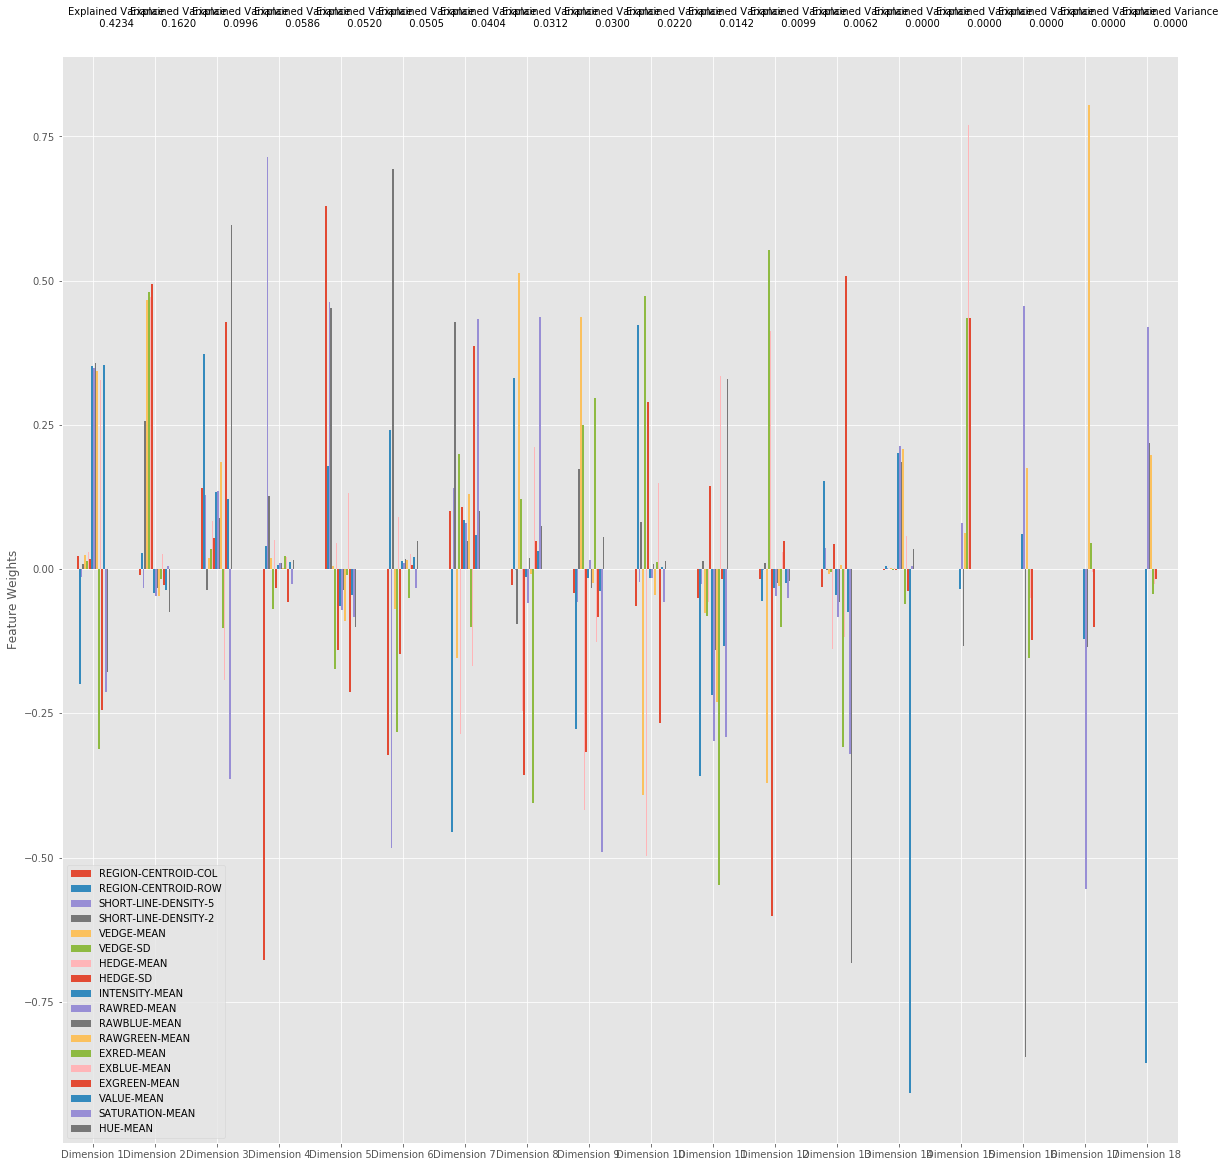

In [27]:
num_of_components = [4, 9, 13, 18]
for i in num_of_components:
    i = int(i)
    pca = PCA(n_components = i)
    pca.fit(X_normalized_zscore)

    # Generate PCA results plot
    pca_results = plot_pca(X_normalized_zscore, pca)

#### 3.2.1.2. Investigaing #Dimensions Needed to Preserve %95 of the Original Variance

In [28]:
pca = PCA(.95)
pca.fit(X_normalized_zscore)
display(pca.explained_variance_ratio_)

array([ 0.42341135,  0.16203649,  0.09959451,  0.05857283,  0.05197997,
        0.05050372,  0.04041415,  0.03120143,  0.02999802,  0.02195028])

#### 3.2.1.3. Investigaing #Dimensions Needed to Preserve %98 of the Original Variance

In [29]:
pca = PCA(.98)
pca.fit(X_normalized_zscore)
display(pca.explained_variance_ratio_)

array([ 0.42341135,  0.16203649,  0.09959451,  0.05857283,  0.05197997,
        0.05050372,  0.04041415,  0.03120143,  0.02999802,  0.02195028,
        0.0142209 ])

#### 3.2.1.4. Applying PCA

In [30]:
features_reduced = ["d" + feature for feature in np.arange(1, pca.n_components_+1).astype('str')]
X_reduced = pd.DataFrame(pca.transform(X_normalized_zscore), columns=features_reduced)
display(X_reduced)

d1        d2        d3        d4        d5        d6        d7  \
0    -2.341008 -0.568638 -0.650548 -0.477064 -0.054783 -0.136842  0.012842   
1    -0.612479 -0.191599 -1.424683  0.624449 -0.971095  0.178148 -0.291384   
2    -0.986023  0.048760 -0.985904  0.647385 -0.896088  0.293113 -0.683960   
3    -1.784409 -0.218240 -0.815338  0.692126 -1.008799  0.378406 -0.564007   
4    -0.840568 -0.284457 -0.870496  2.507168  0.477375 -1.112985 -0.088878   
5    -0.497166 -0.026817 -1.148369  0.190721 -0.512381 -0.019170 -0.440232   
6    -0.616498  0.028670 -0.721122  1.995712  0.987315 -1.406133 -0.139021   
7    -0.606379 -0.345504 -0.985121 -0.466912  0.139852 -0.240579 -0.331362   
8    -0.556099 -0.099356 -1.474101  0.489699 -0.853301  0.066391 -0.261186   
9    -0.920873 -0.297635 -1.428260  0.831645 -1.242927  0.268776 -0.190548   
10   -1.157221 -0.333159 -0.996147  0.598124 -0.889067  0.279689 -0.521061   
11   -1.063474 -0.094661 -0.529351  2.581788  0.414788 -1.015657 -0.289290   
12   -0.985916 -0.336779 -0.550753  2.122274  0.817480 -1.265628 -0.091833   
13   -1.210331 -0.198951 -1.055230  0.825672 -1.168141  0.326482 -0.487676   
14   -0.717101 -0.290457 -0.793273  2.161005  0.751873 -1.343379  0.023042   
15   -0.425876 -0.296811 -1.038360 -0.436665  0.151791 -0.208142 -0.377001   
16   -0.062635 -0.205131 -1.276611 -0.330228  0.014716 -0.248289 -0.265724   
17   -0.886784 -0.387908 -0.969632  0.141301 -0.480332  0.045291 -0.390777   
18   -1.168358  0.018675 -0.288599  2.068995  0.952813 -1.213706 -0.388945   
19   -1.568096 -0.386736 -0.398264  2.181561  0.733470 -1.230416 -0.124791   
20   -0.068506  0.071893 -1.275634 -0.214001 -0.122107 -0.237934 -0.312053   
21   -1.232943 -0.350659 -0.933914  0.212444 -0.534373  0.093582 -0.456001   
22   -0.595763 -0.012947 -1.319343  0.273370 -0.632944 -0.024047 -0.334472   
23   -1.061361 -0.424002 -0.566139  2.036205  0.908046 -1.290789 -0.062975   
24    0.121344  0.114724 -1.282221 -0.251411 -0.094181 -0.279895 -0.293143   
25   -0.431680 -0.348080 -1.515227  0.473163 -0.858068  0.080139 -0.140047   
26   -1.389388 -0.302241 -0.907463  0.792834 -1.079289  0.389286 -0.604281   
27   -0.634048 -0.230249 -0.897787  2.226150  0.693199 -1.333114  0.040264   
28   -0.704694  0.007709 -1.621150  0.836828 -1.269256  0.180016 -0.150910   
29   -0.211356 -0.390688 -0.757955  1.582168  1.376322 -1.553314  0.080611   
...        ...       ...       ...       ...       ...       ...       ...   
2280 -2.431753 -0.598234 -0.198305 -1.457592  0.872426 -0.547572 -0.100605   
2281 -0.720067 -0.348201 -1.014133 -1.118727  0.741097 -0.432016  0.007521   
2282  0.008047 -0.458812 -1.147452 -0.769943  0.397067 -0.294299  0.056790   
2283 -0.632578 -0.173947 -1.202242 -1.144285  0.708966 -0.529730  0.138511   
2284 -1.184630  0.406885 -1.226245 -1.365112  0.815946 -0.631921  0.232897   
2285 -2.389541 -0.772029  1.121224 -1.446023  0.858895 -0.478036 -0.503811   
2286 -1.005579 -0.446289 -1.361937 -1.530855  0.986850 -0.733352  0.484828   
2287 -2.611533 -0.426755 -1.467681 -0.081136 -0.524911  0.079826  0.534323   
2288  0.526245 -0.129914 -0.759269 -0.739562  0.456020 -0.208572 -0.249028   
2289 -2.704381 -0.436558 -1.417239 -1.203257  0.358440 -0.574349  1.026228   
2290 -1.541488 -0.505848 -1.463883 -1.161729  0.418200 -0.690192  0.737099   
2291 -2.087331 -0.277781 -1.170903  0.290853 -0.729070  0.240361 -0.040330   
2292 -0.541884 -0.438431 -1.067123 -0.648039  0.154124 -0.317531  0.121643   
2293 -0.469645 -0.494934 -1.165916 -0.057714 -0.299255  0.019311 -0.116015   
2294 -1.788323  1.973615 -0.245073 -0.524448  0.028144 -0.119278 -0.801171   
2295 -0.745467 -0.335426 -1.301855 -1.168763  0.395938 -0.794621  0.634164   
2296 -1.620683 -0.531906 -1.485987 -1.313079  0.550597 -0.752682  0.813567   
2297 -2.507683 -0.744059  1.034842 -0.298174 -0.122916  0.158742 -0.853223   
2298 -2.408434 -0.403150 -1.584270  0.572407 -1.082658  0.392644  0.327945   
2299 -1.612433 -0.551710 -1.466826

#### 3.2.1.5. Reduced Correlation Matrix

In [31]:
reduced_correlation_matrix = X_reduced.corr(method='pearson')
display(reduced_correlation_matrix)

d1            d2            d3            d4            d5  \
d1   1.000000e+00  1.764606e-16 -2.932843e-16 -1.114822e-15 -2.331293e-16   
d2   1.764606e-16  1.000000e+00 -6.276123e-17 -1.872488e-16  2.961900e-16   
d3  -2.932843e-16 -6.276123e-17  1.000000e+00 -2.270942e-16 -5.922744e-17   
d4  -1.114822e-15 -1.872488e-16 -2.270942e-16  1.000000e+00  4.540960e-16   
d5  -2.331293e-16  2.961900e-16 -5.922744e-17  4.540960e-16  1.000000e+00   
d6  -5.611066e-17 -8.896125e-17  5.632198e-17 -5.737942e-16 -7.275496e-16   
d7  -1.237557e-16 -2.262985e-16 -2.841986e-16 -4.534975e-16 -1.903735e-16   
d8  -4.435023e-16 -5.890029e-16 -4.278193e-16  2.491463e-16  5.429415e-16   
d9   5.241398e-16 -2.493757e-16  7.326231e-17  2.470877e-16  4.289550e-16   
d10 -3.657180e-16 -2.997883e-16  6.013348e-17  3.242991e-16 -2.846695e-16   
d11 -9.813992e-16  3.101965e-16  5.509167e-17  2.520120e-16 -1.895403e-17   

               d6            d7            d8            d9           d10  \
d1  -5.611066e-17 -1.237557e-16 -4.435023e-16  5.241398e-16 -3.657180e-16   
d2  -8.896125e-17 -2.262985e-16 -5.890029e-16 -2.493757e-16 -2.997883e-16   
d3   5.632198e-17 -2.841986e-16 -4.278193e-16  7.326231e-17  6.013348e-17   
d4  -5.737942e-16 -4.534975e-16  2.491463e-16  2.470877e-16  3.242991e-16   
d5  -7.275496e-16 -1.903735e-16  5.429415e-16  4.289550e-16 -2.846695e-16   
d6   1.000000e+00 -1.219261e-16  2.724575e-16  2.721322e-16 -8.975356e-16   
d7  -1.219261e-16  1.000000e+00  8.165031e-17  3.442683e-16  8.238732e-16   
d8   2.724575e-16  8.165031e-17  1.000000e+00 -9.008635e-16  5.437443e-17   
d9   2.721322e-16  3.442683e-16 -9.008635e-16  1.000000e+00 -1.540138e-15   
d10 -8.975356e-16  8.238732e-16  5.437443e-17 -1.540138e-15  1.000000e+00   
d11 -4.348455e-16  6.652269e-16  1.763915e-17  6.370045e-17  2.824942e-16   

              d11  
d1  -9.813992e-16  
d2   3.101965e-16  
d3   5.509167e-17  
d4   2.520120e-16  
d5  -1.895403e-17  
d6  -4.348455e-16  
d7   6.652269e-16  
d8   1.763915e-17  
d9   6.370045e-17  
d10  2.824942e-16  
d11  1.000000e+00

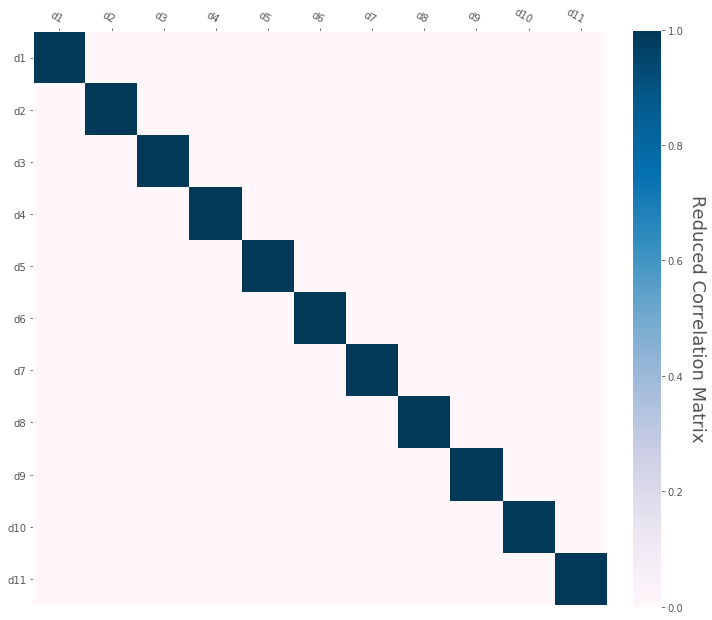

In [32]:
intervals = np.arange(len(features_reduced))
fig, ax = plt.subplots(figsize=(10, 10))
im, cbar = heatmap(reduced_correlation_matrix, features_reduced, intervals, features_reduced, intervals, rotate=True,
                   ax=ax, cmap="PuBu", cbarlabel="Reduced Correlation Matrix")

fig.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

---
**Comments:**
*  **It's obvious that features are almost uncorrelated. This means that $\textbf{PCA}$ succeeded in producing smaller number of independent features.**

### 3.2.2. Feature Selection

#### 3.2.2.1. Different Values of K

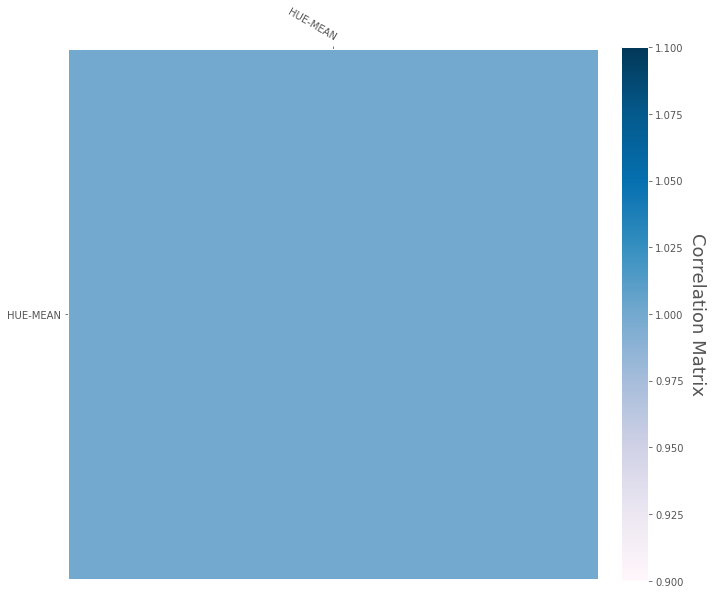

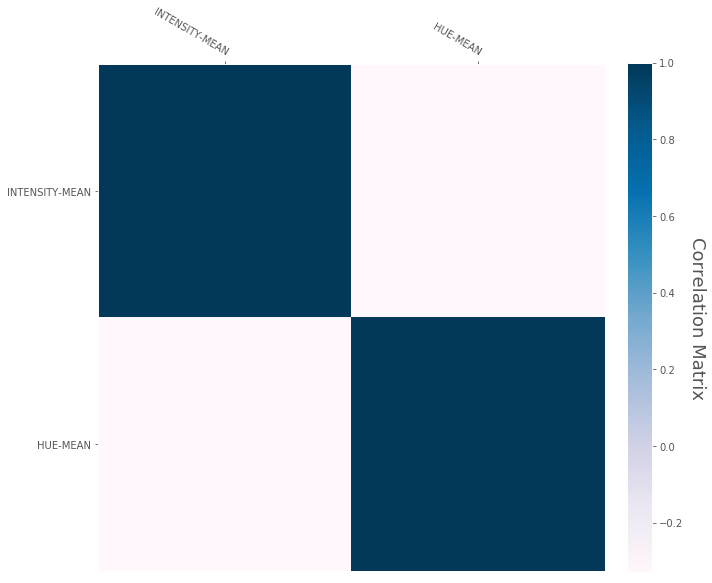

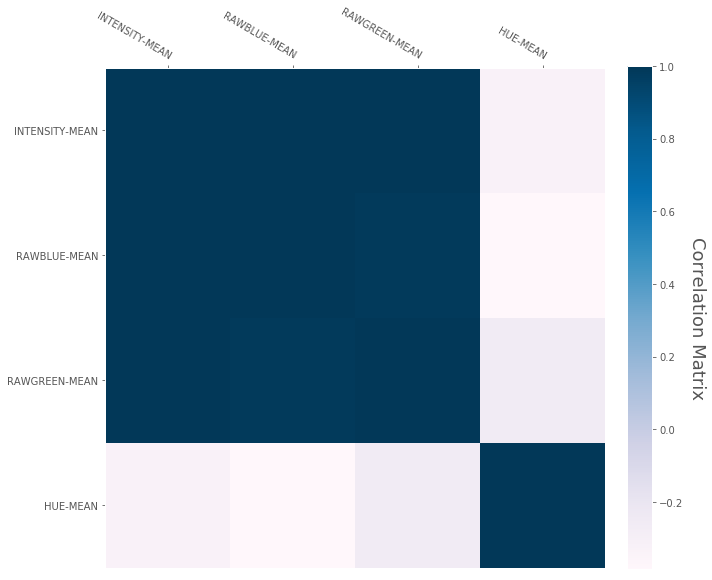

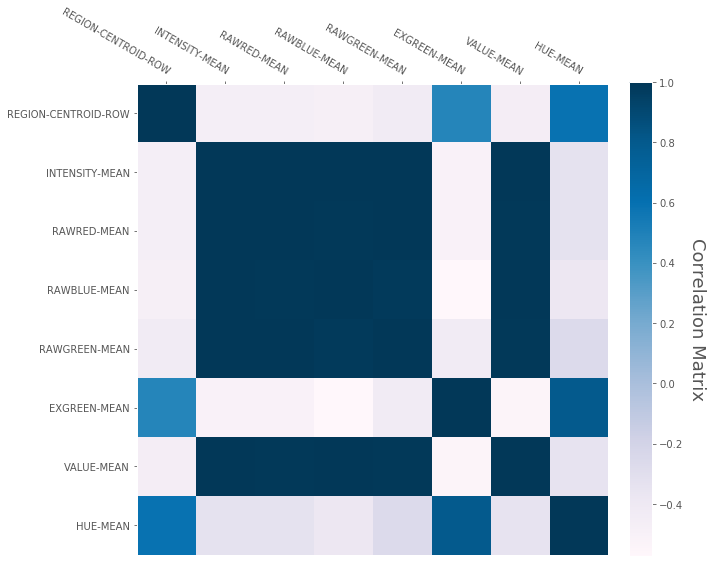

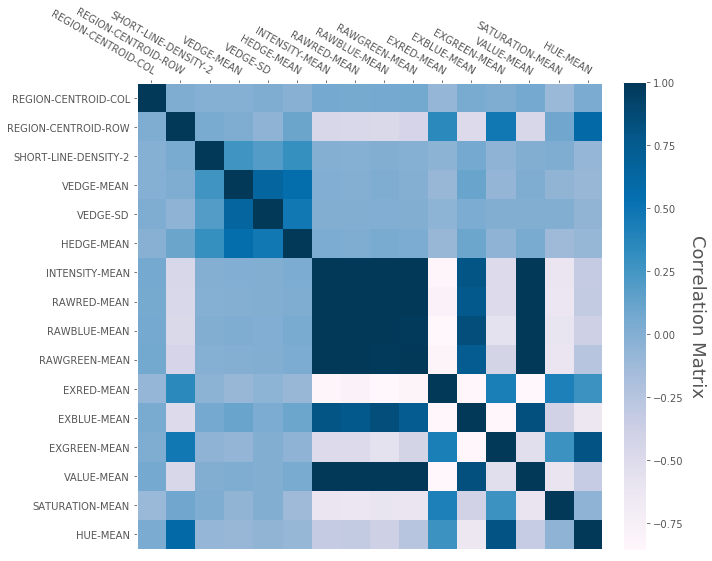

In [33]:
k = 1
while k < 19:
    k_best = SelectKBest(k=k)
    X_new = k_best.fit_transform(X, y)
    indices = k_best.get_support(True)
    X_new_df = pd.DataFrame(X_new, columns = features[indices])
    cor_matrix = X_new_df.corr(method='pearson')
    intervals = np.arange(X_new.shape[1])
    fig, ax = plt.subplots(figsize=(10, 10))
    im, cbar = heatmap(cor_matrix, X_new_df.columns, intervals, X_new_df.columns, intervals, rotate=True,
                   ax=ax, cmap="PuBu", cbarlabel="Correlation Matrix")
    k *= 2
    fig.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.show()

---
**Comments:**
*  **As $K$ increases, the features are more correlated to each other. The best value of $K$ can be `1` or `2`. In order to preserve as much information as possible, let's use $K = 2$ **

In [34]:
k_best = SelectKBest(k=2)
X_new = k_best.fit_transform(X, y)
indices = k_best.get_support(True)
X_new_df = pd.DataFrame(X_new, columns = features[indices])

In [35]:
display(X_new_df.head())

INTENSITY-MEAN  HUE-MEAN
0        6.185185 -1.121818
1       21.592592 -1.700324
2       20.629630 -1.519702
3       14.703704 -0.975700
4       21.111110 -1.603958

#### 3.2.2.2. Plotting New Data

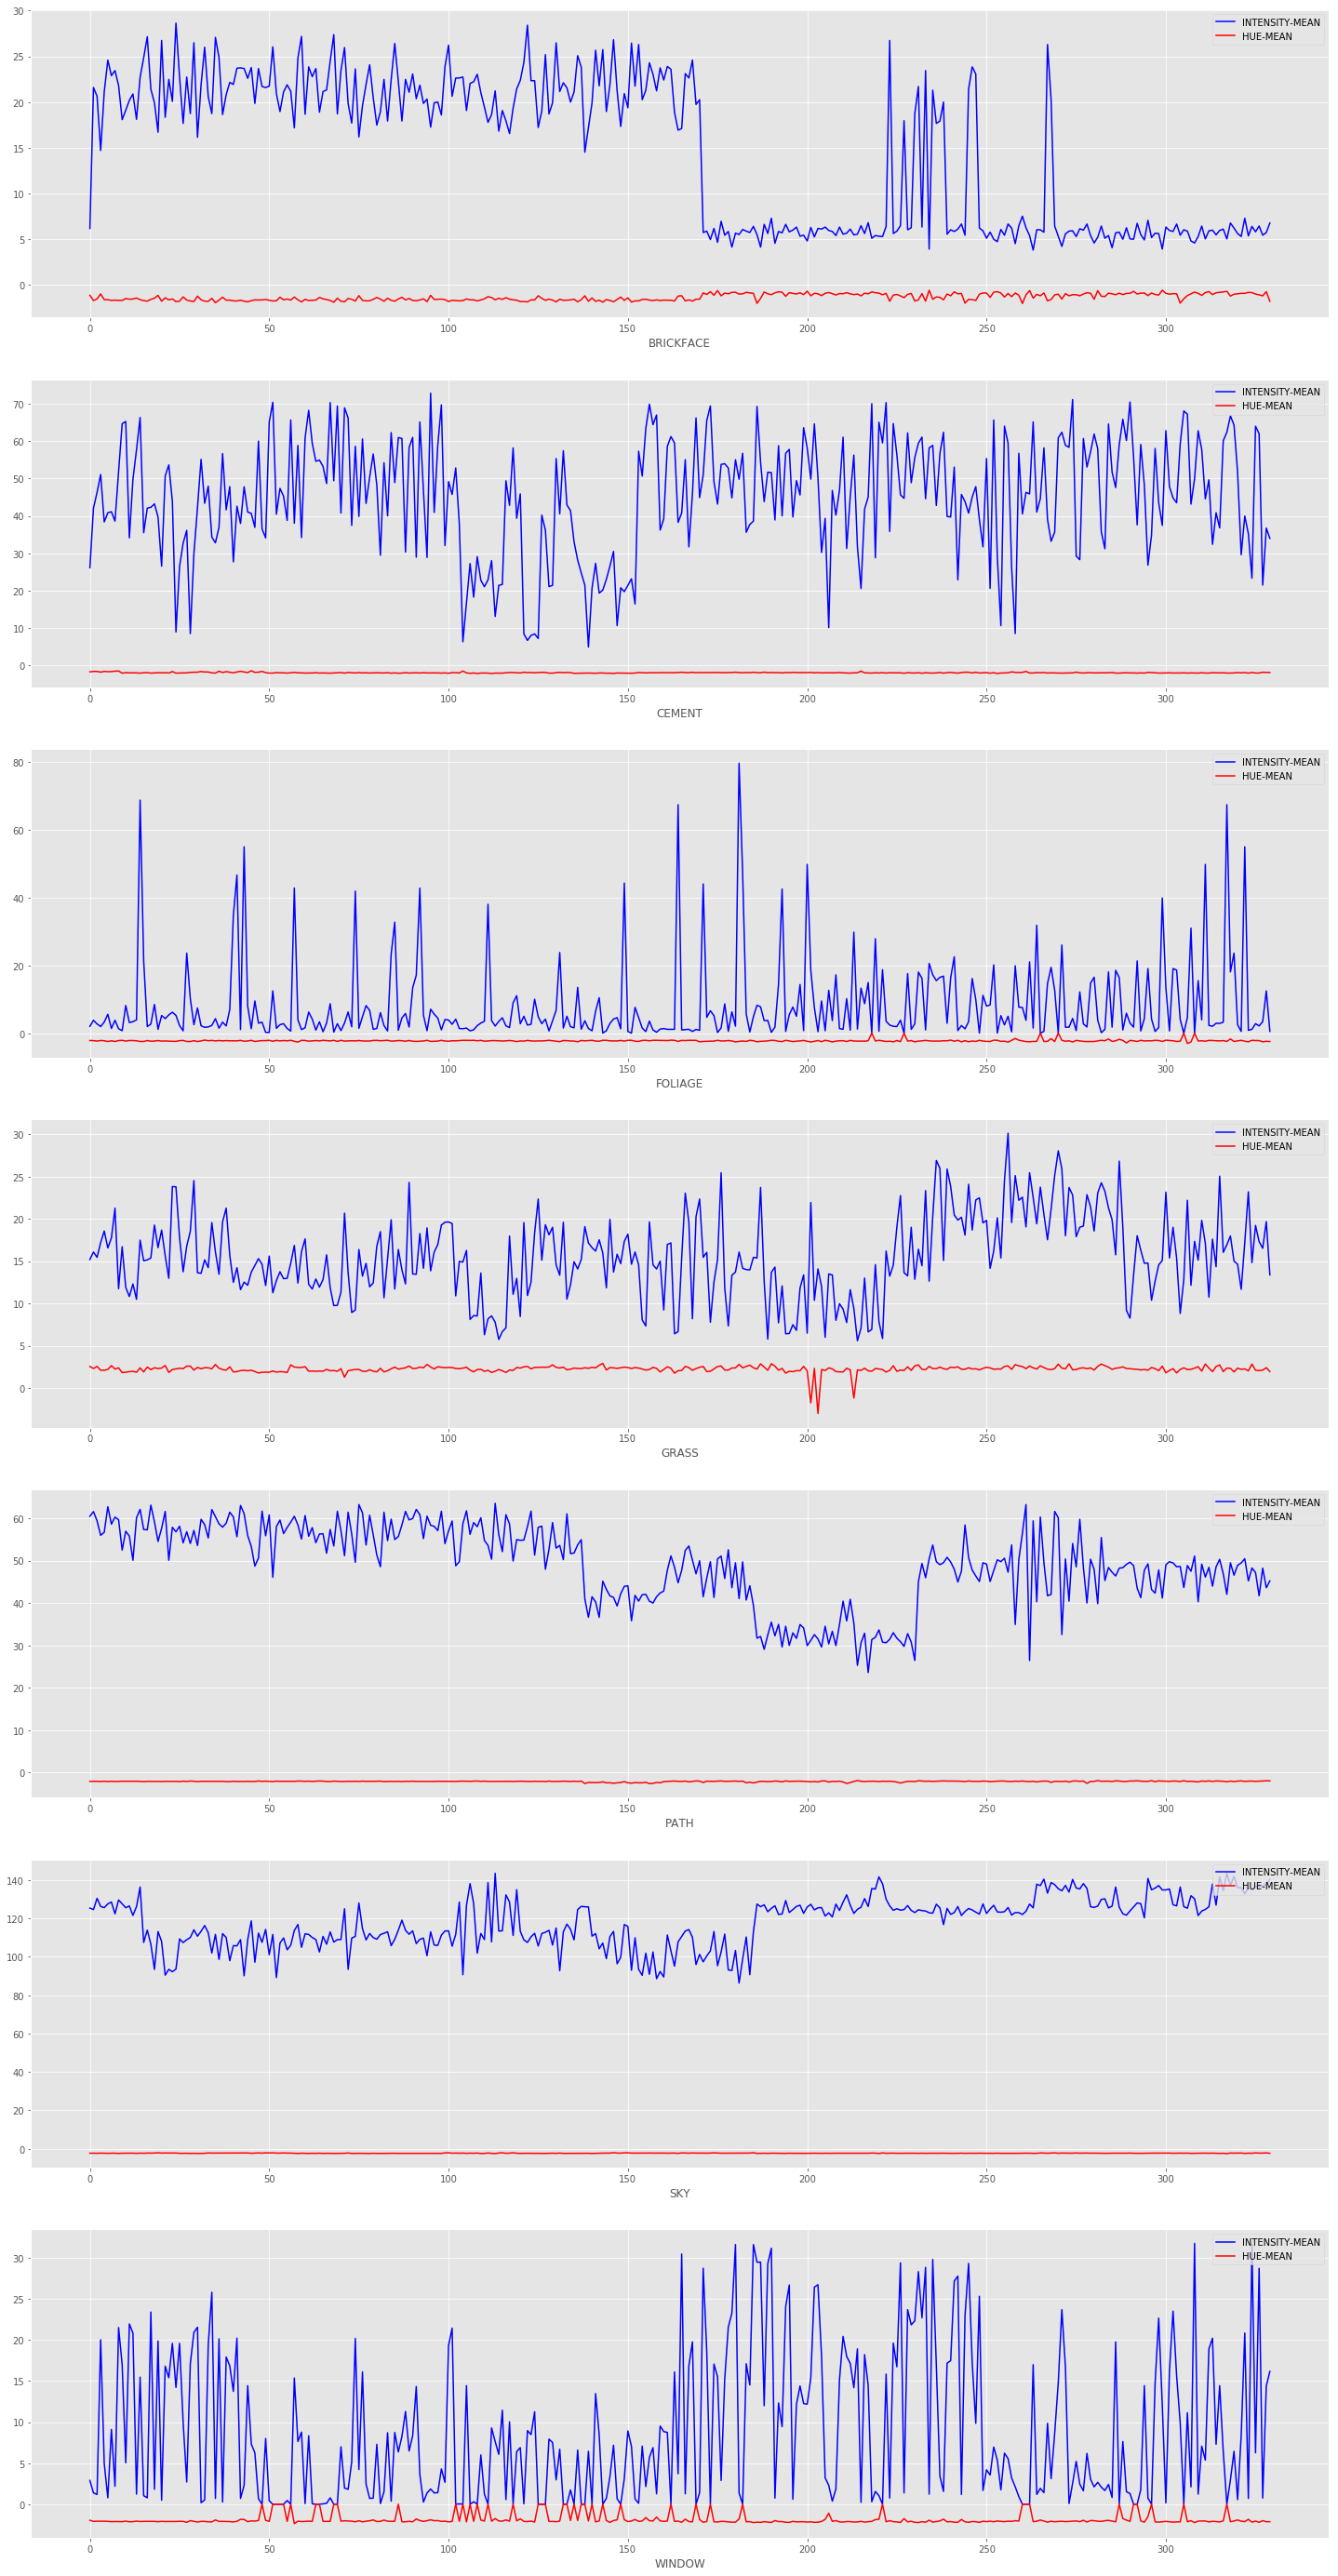

In [36]:
fig, axes = plt.subplots(nrows= 7, ncols=1, figsize=(25,50))
colors = ['blue', 'red']

for i, ax in enumerate(axes.flat):
    for feature in range(X_new.shape[1]):
        ax.plot(X_new[y_df == classes[i], feature], label=X_new_df.columns[feature], color=colors[feature])
        ax.set_xlabel(classes[i])  
        ax.legend(loc='upper right')
        
plt.show()

---
**Comments:**
*  **Despite 'HUE-MEAN' is selected as the best feature when choosing $K=1$, the previous plots show that 'INTENSITY-MEAN' has a wider range of values.**

[[ 6.185185  -1.1218182]]


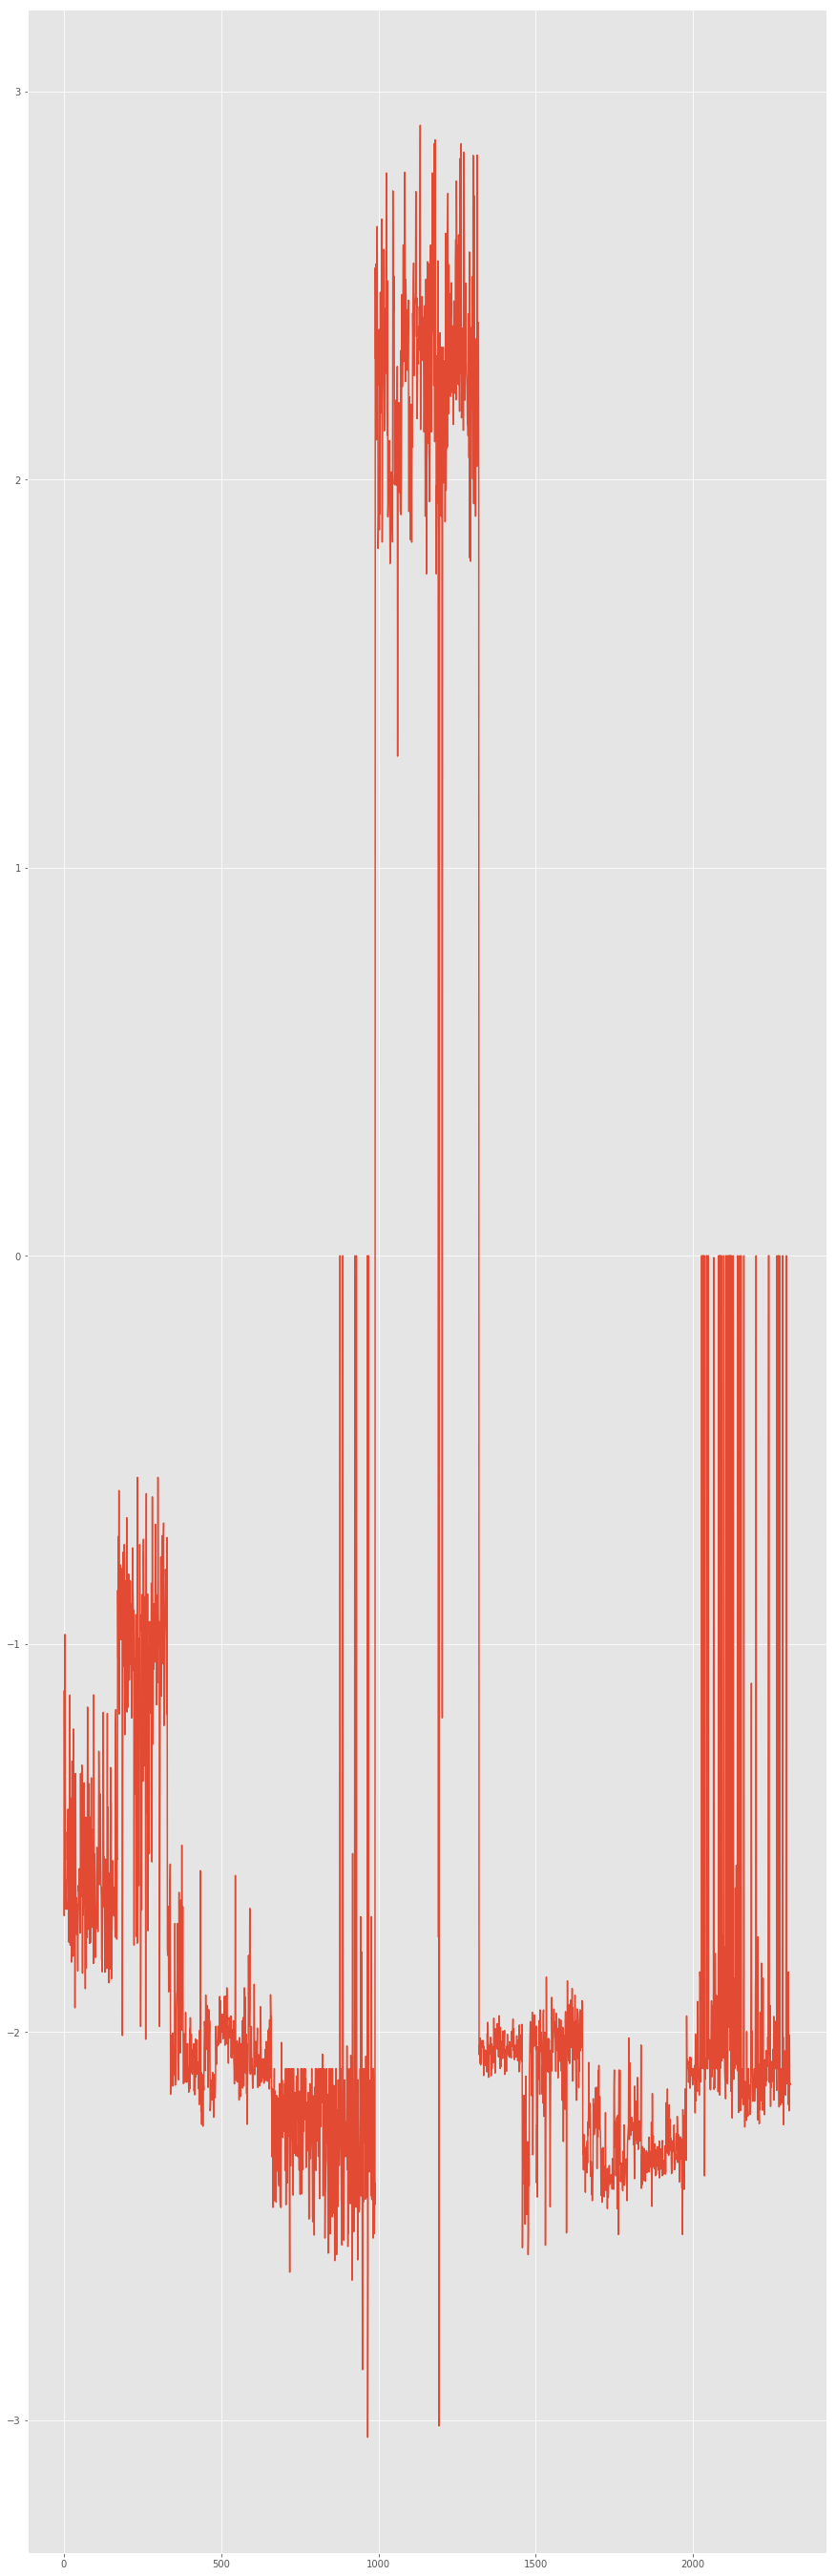

In [39]:
plt.plot(X_new[:, 1]);
print(X_new[:1])
plt.show()